# Name: Toh Kien Yu<br>Admin Number: 2222291<br>Class: DAAA/FT/2B/05

## Background Research

### Image classification is an important part of digital image analysis and plays a crucial role in real world applications. For instance, visual search, object detection and more.<br>In this assignment, I will be doing image classification on vegetables using a deep learning network.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import image_dataset_from_directory
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# import tensorflow.keras.utils import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization,LeakyReLU,GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from tensorflow.keras.utils import plot_model
import scipy
import PIL

In [27]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Loading 31 by 31 Dataset

### Image Size set to 31 by 31, greyscale and 'categorical' label mode

In [28]:
train = image_dataset_from_directory(directory='./Dataset for CA1 part A/train',color_mode='grayscale',label_mode='categorical',image_size=(31,31))
test = image_dataset_from_directory(directory='./Dataset for CA1 part A/test',color_mode='grayscale',label_mode='categorical',image_size=(31,31))
validation = image_dataset_from_directory(directory='./Dataset for CA1 part A/validation',color_mode='grayscale',label_mode='categorical',image_size=(31,31))

Found 9028 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


## Data Preparation

In [29]:
X_train = []
y_train = []

for images, labels in train:
    X_train.append(images)
    y_train.append(labels)

X_train = np.concatenate(X_train, axis=0)
X_train = np.squeeze(X_train, axis=-1)
y_train = np.concatenate(y_train, axis=0)

In [30]:
X_test = []
y_test = []

for images, labels in test:
    X_test.append(images)
    y_test.append(labels)

X_test = np.concatenate(X_test, axis=0)
X_test = np.squeeze(X_test, axis=-1)
y_test = np.concatenate(y_test, axis=0)

In [31]:
X_val = []
y_val = []

for images, labels in validation:
    X_val.append(images)
    y_val.append(labels)

X_val = np.concatenate(X_val, axis=0)
X_val = np.squeeze(X_val, axis=-1)
y_val = np.concatenate(y_val, axis=0)

### Scaling the data to the range [0,1] 

In [32]:
from tensorflow.keras.utils import to_categorical
X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0
X_val = np.array(X_val) / 255.0

### Train, Test and Validation shape

In [33]:
print("Length of X train: " + str(len(X_train)))
print("Length of X test: " + str(len(X_test)))
print("Length of X validation: " + str(len(X_val)))
print("Length of y train: " + str(len(y_train)))
print("Length of y test: " + str(len(y_test)))
print("Length of y validation: " + str(len(y_val)))

Length of X train: 9028
Length of X test: 3000
Length of X validation: 3000
Length of y train: 9028
Length of y test: 3000
Length of y validation: 3000


## Exploratory Data Analysis

### 31 by 31 Training Images (With Color)

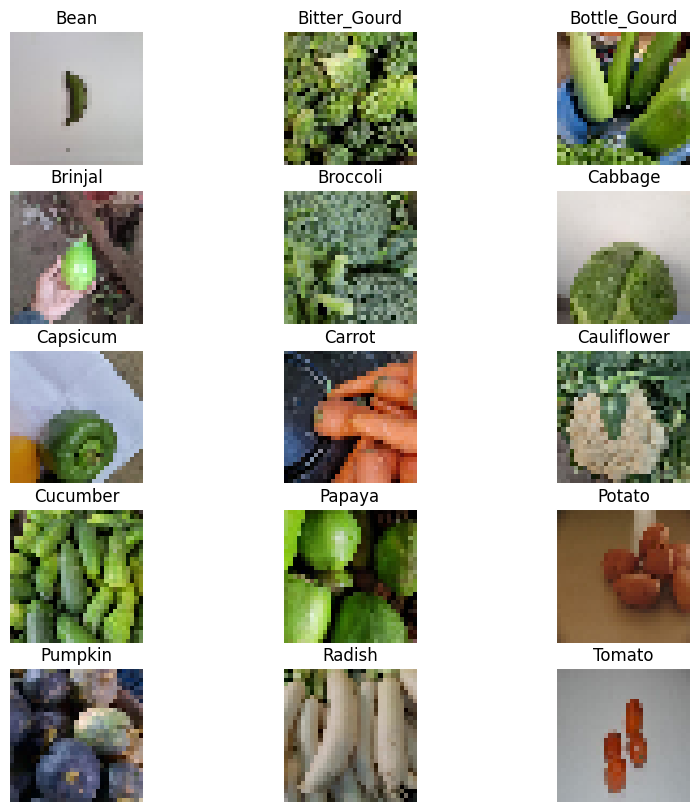

In [19]:
import os
from tensorflow.keras.preprocessing import image
# classes = train.class_names
classes = ['Bean','Bitter_Gourd','Bottle_Gourd','Brinjal','Broccoli','Cabbage','Capsicum','Carrot','Cauliflower','Cucumber','Papaya','Potato','Pumpkin','Radish','Tomato']
trainDir = './Dataset for CA1 part A/train'

class_name = os.listdir(trainDir)
figure = plt.figure(figsize= (10,10))
for className in classes:
    classDir = os.path.join(trainDir,className)
    fileList = os.listdir(classDir) 
    if len(fileList) > 0:
        imagePath = os.path.join(classDir,fileList[0])
        img = image.load_img(imagePath,target_size=(31,31))
        ax = plt.subplot(5,3,classes.index(className)+1)
        plt.title(className)
        plt.imshow(img)
        plt.axis('off')

plt.show()

### 31 by 31 Training Images (Grayscale)

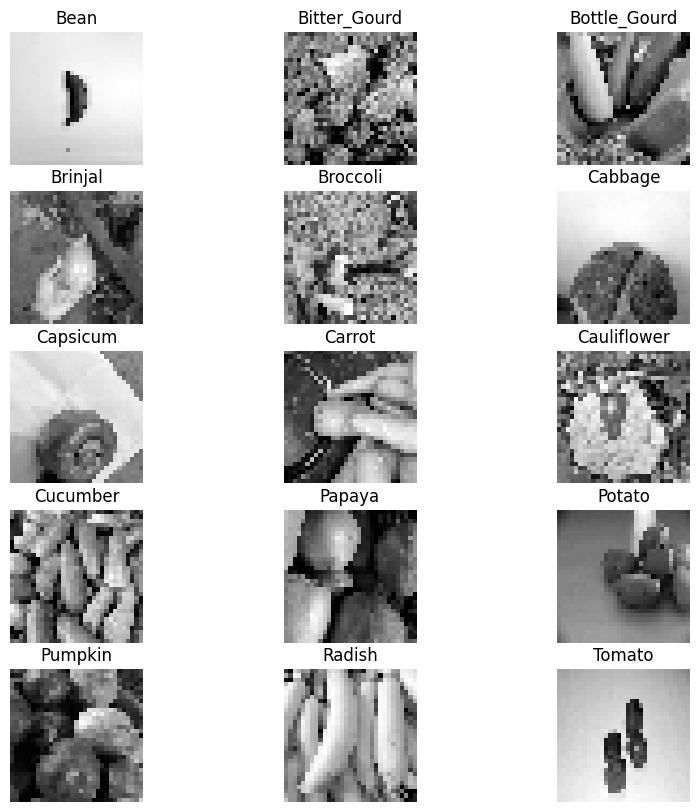

In [20]:
import os
from tensorflow.keras.preprocessing import image
# classes = train.class_names
classes = ['Bean','Bitter_Gourd','Bottle_Gourd','Brinjal','Broccoli','Cabbage','Capsicum','Carrot','Cauliflower','Cucumber','Papaya','Potato','Pumpkin','Radish','Tomato']
trainDir = './Dataset for CA1 part A/train'

class_name = os.listdir(trainDir)
figure = plt.figure(figsize= (10,10))
for className in classes:
    classDir = os.path.join(trainDir,className)
    fileList = os.listdir(classDir) 
    if len(fileList) > 0:
        imagePath = os.path.join(classDir,fileList[0])
        img = image.load_img(imagePath,target_size=(31,31),color_mode='grayscale')
        ax = plt.subplot(5,3,classes.index(className)+1)
        plt.title(className)
        plt.imshow(img,cmap='gray')
        plt.axis('off')

plt.show()

### 128 by 128 Training Images (With Color)

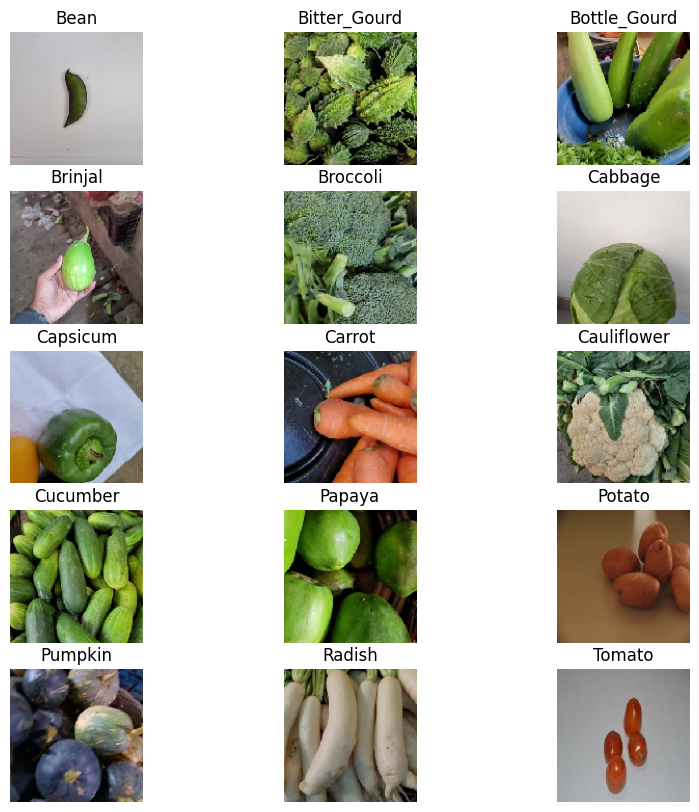

In [35]:
import os
from tensorflow.keras.preprocessing import image
# classes = train.class_names
classes = ['Bean','Bitter_Gourd','Bottle_Gourd','Brinjal','Broccoli','Cabbage','Capsicum','Carrot','Cauliflower','Cucumber','Papaya','Potato','Pumpkin','Radish','Tomato']
trainDir = './Dataset for CA1 part A/train'

class_name = os.listdir(trainDir)
figure = plt.figure(figsize= (10,10))
for className in classes:
    classDir = os.path.join(trainDir,className)
    fileList = os.listdir(classDir) 
    if len(fileList) > 0:
        imagePath = os.path.join(classDir,fileList[0])
        img = image.load_img(imagePath,target_size=(128,128))
        ax = plt.subplot(5,3,classes.index(className)+1)
        plt.title(className)
        plt.imshow(img)
        plt.axis('off')

plt.show()

### 128 by 128 Training Images (Grayscale)

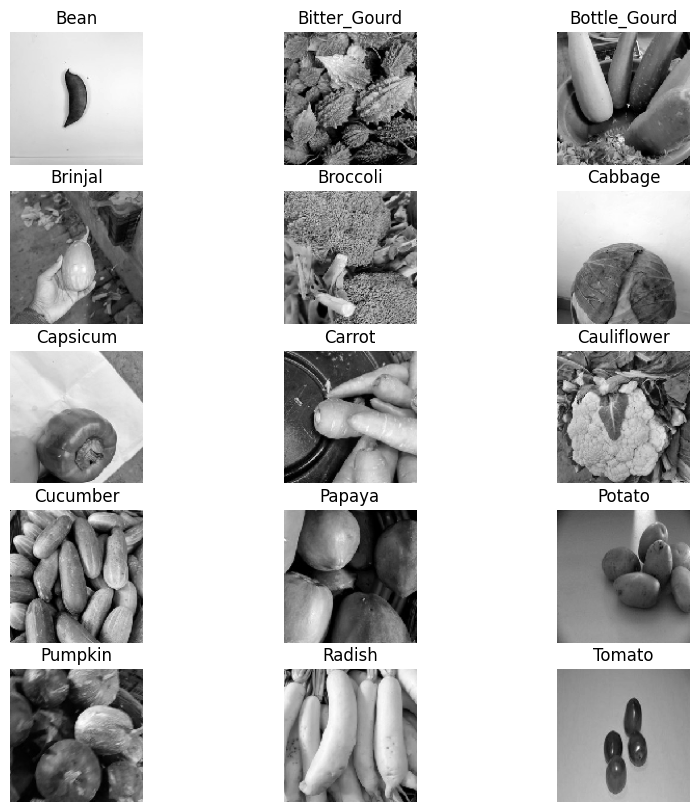

In [36]:
import os
from tensorflow.keras.preprocessing import image
# classes = train.class_names
classes = ['Bean','Bitter_Gourd','Bottle_Gourd','Brinjal','Broccoli','Cabbage','Capsicum','Carrot','Cauliflower','Cucumber','Papaya','Potato','Pumpkin','Radish','Tomato']
trainDir = './Dataset for CA1 part A/train'

class_name = os.listdir(trainDir)
figure = plt.figure(figsize= (10,10))
for className in classes:
    classDir = os.path.join(trainDir,className)
    fileList = os.listdir(classDir) 
    if len(fileList) > 0:
        imagePath = os.path.join(classDir,fileList[0])
        img = image.load_img(imagePath,target_size=(128,128),color_mode='grayscale')
        ax = plt.subplot(5,3,classes.index(className)+1)
        plt.title(className)
        plt.imshow(img,cmap='gray')
        plt.axis('off')

plt.show()

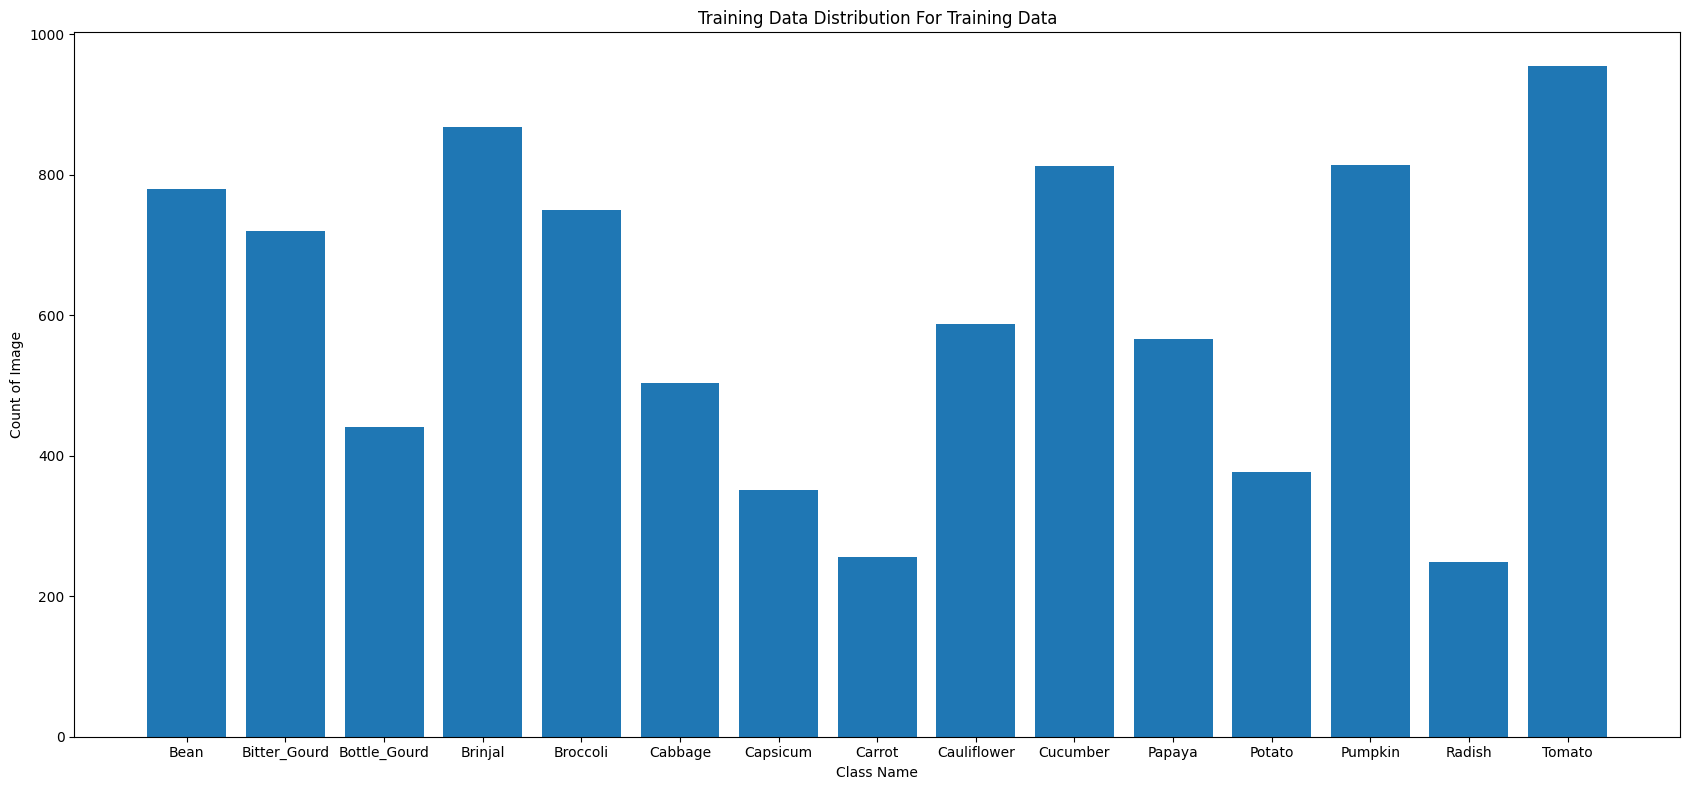

In [80]:
import os
datasetDir = './Dataset for CA1 part A/train'
classNames = os.listdir(datasetDir)
classCounts = {}
for className in classNames:
    classDir = os.path.join(datasetDir,className)
    classCounts[className] = len(os.listdir(classDir))

plt.figure(figsize=(17,8))
plt.title("Training Data Distribution For Training Data")
plt.xlabel("Class Name")
plt.ylabel("Count of Image")
plt.bar(classCounts.keys(),classCounts.values())
plt.tight_layout()
plt.show()

## Utilities

### Function to plot model's accuracy and loss graph

In [2]:
def plotAUC(model):
    fig = plt.figure(figsize = (18,7))
    fig.set_facecolor('lightblue')
    fig.suptitle('Accuracy and Loss Graph')
    ax1 = fig.add_subplot(1,2,1)
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.plot(model.history['accuracy'])
    ax1.plot(model.history['val_accuracy'])
    ax1.legend(['Train','Validate'])

    ax2 = fig.add_subplot(1,2,2)
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.plot(model.history['loss'])
    ax2.plot(model.history['val_loss'])
    ax2.legend(['Train','Validate'])
    plt.tight_layout()
    plt.show()

## Modeling (31 by 31)<br>I will make 3 Models and choose the best 2 models to further model improve

## Model 1 (31 x 31)

### Model 1 is designed to be a simple model

Epoch 1/100
71/71 [==============================] - 1s 12ms/step - loss: 2.3782 - accuracy: 0.2200 - val_loss: 2.2191 - val_accuracy: 0.3117
Epoch 2/100
71/71 [==============================] - 1s 8ms/step - loss: 1.8197 - accuracy: 0.4262 - val_loss: 1.8108 - val_accuracy: 0.4280
Epoch 3/100
71/71 [==============================] - 1s 8ms/step - loss: 1.4820 - accuracy: 0.5348 - val_loss: 1.5703 - val_accuracy: 0.5067
Epoch 4/100
71/71 [==============================] - 1s 8ms/step - loss: 1.2395 - accuracy: 0.6097 - val_loss: 1.2823 - val_accuracy: 0.5880
Epoch 5/100
71/71 [==============================] - 1s 8ms/step - loss: 1.0336 - accuracy: 0.6767 - val_loss: 1.1425 - val_accuracy: 0.6327
Epoch 6/100
71/71 [==============================] - 1s 8ms/step - loss: 0.9093 - accuracy: 0.7182 - val_loss: 1.0185 - val_accuracy: 0.6860
Epoch 7/100
71/71 [==============================] - 1s 8ms/step - loss: 0.7660 - accuracy: 0.7646 - val_loss: 1.0090 - val_accuracy: 0.6880
Epoch 8/100


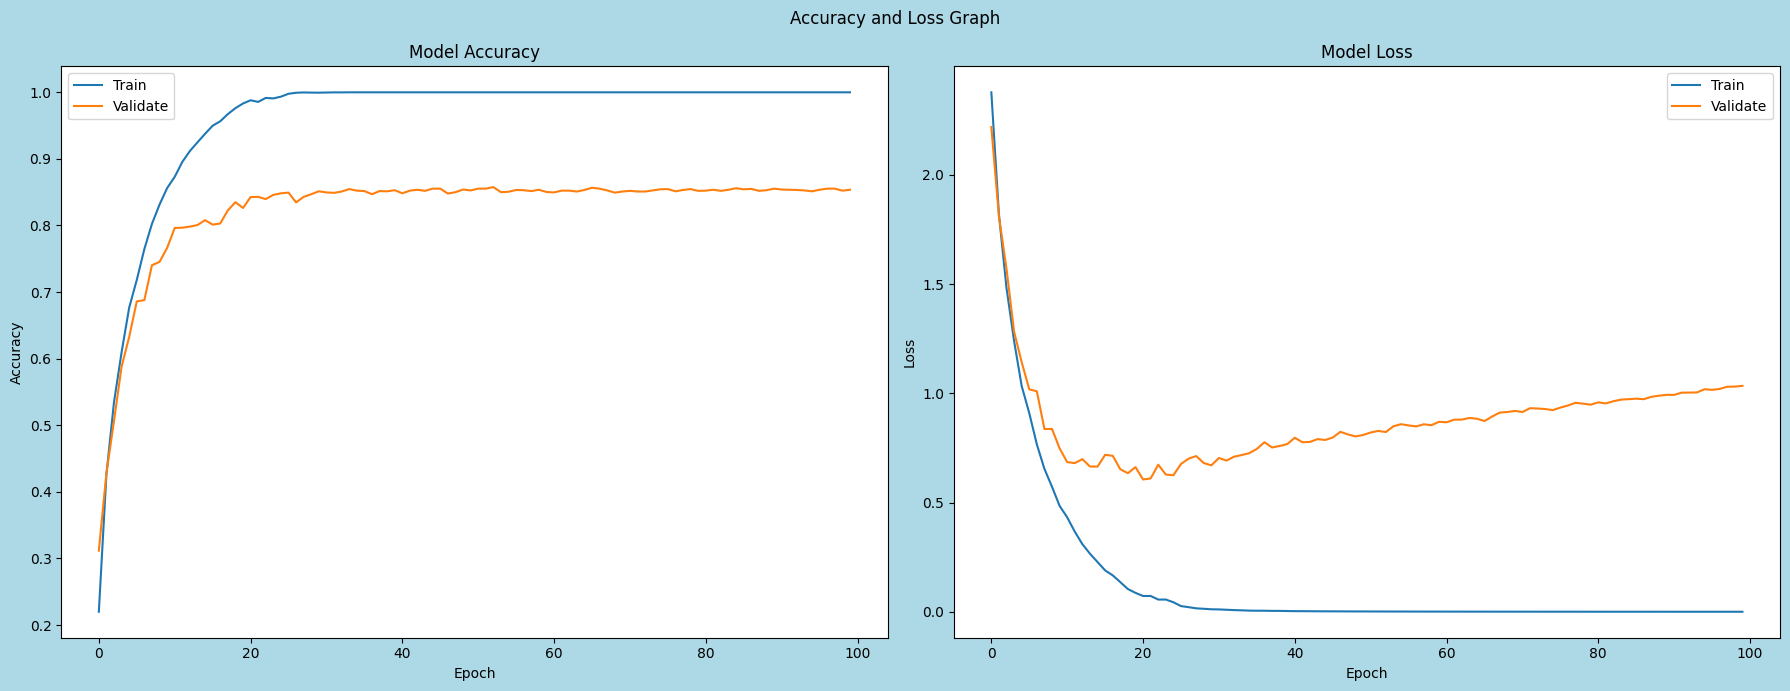

In [83]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(31,31,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(15,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train,y_train, validation_data=(X_val,y_val),epochs=100, batch_size=128)

scores = model.evaluate(X_test,y_test)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
plotAUC(history)

### The model is overfitting, achieving a high training accuracy of 1.0 whereas a lower validation score<br> To handle the overfitting issue, we will introduce Dropouts into our layers.

Epoch 1/100
71/71 [==============================] - 2s 11ms/step - loss: 2.5183 - accuracy: 0.1646 - val_loss: 2.4102 - val_accuracy: 0.2410
Epoch 2/100
71/71 [==============================] - 1s 9ms/step - loss: 2.1042 - accuracy: 0.3281 - val_loss: 1.9684 - val_accuracy: 0.3987
Epoch 3/100
71/71 [==============================] - 1s 9ms/step - loss: 1.8322 - accuracy: 0.4197 - val_loss: 1.7108 - val_accuracy: 0.4813
Epoch 4/100
71/71 [==============================] - 1s 9ms/step - loss: 1.6353 - accuracy: 0.4744 - val_loss: 1.5148 - val_accuracy: 0.5273
Epoch 5/100
71/71 [==============================] - 1s 9ms/step - loss: 1.4793 - accuracy: 0.5247 - val_loss: 1.4051 - val_accuracy: 0.5453
Epoch 6/100
71/71 [==============================] - 1s 9ms/step - loss: 1.3552 - accuracy: 0.5630 - val_loss: 1.2709 - val_accuracy: 0.5930
Epoch 7/100
71/71 [==============================] - 1s 9ms/step - loss: 1.2569 - accuracy: 0.5949 - val_loss: 1.1353 - val_accuracy: 0.6463
Epoch 8/100


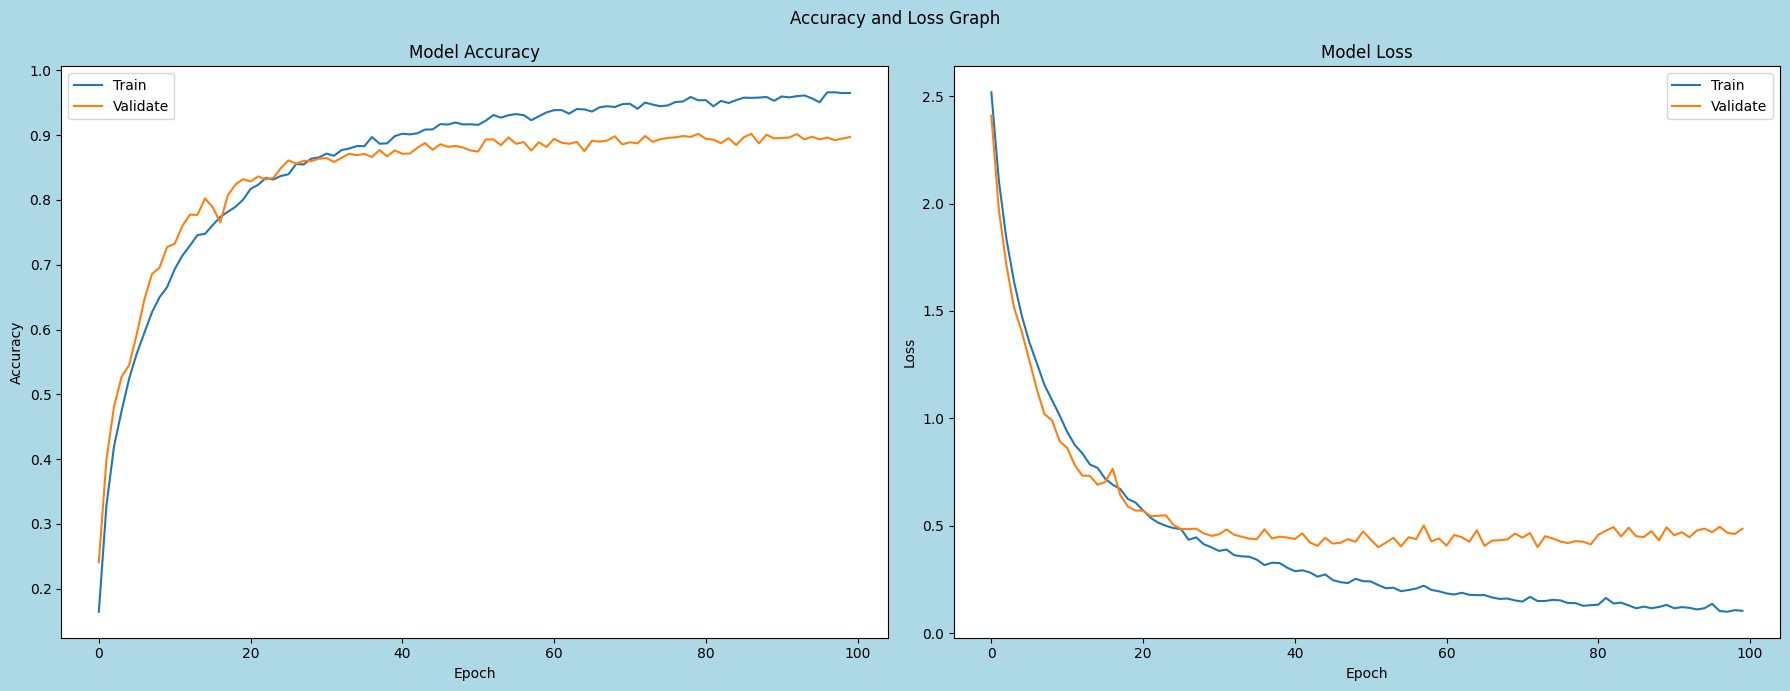

In [84]:
# Model 1
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(31,31,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train,y_train, validation_data=(X_val,y_val),epochs=100, batch_size=128)
model.save_weights("./CNN Weights (31 by 31)/model1.h5")
scores = model.evaluate(X_test,y_test)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
plotAUC(history)

In [85]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 29, 29, 64)        640       
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 dropout_57 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_65 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 6, 6, 128)        0         
 g2D)                                                            
                                                                 
 dropout_58 (Dropout)        (None, 6, 6, 128)       

## Load model 1

In [86]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(31,31,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.load_weights("./CNN Weights (31 by 31)/model1.h5")

## Model 2 (31 x 31)

### Model 2 will be a deeper model with extra layers compared to Model 1. This complexity aims to capture more patterns when classifying the image

### To start off, we will first compare whether Flatten or GlobalAveragePooling2D gives a better accuracy

### Flatten

Epoch 1/100
71/71 [==============================] - 2s 15ms/step - loss: 2.5758 - accuracy: 0.1089 - val_loss: 2.6219 - val_accuracy: 0.0910
Epoch 2/100
71/71 [==============================] - 1s 10ms/step - loss: 2.3904 - accuracy: 0.1712 - val_loss: 2.4330 - val_accuracy: 0.1590
Epoch 3/100
71/71 [==============================] - 1s 10ms/step - loss: 2.1387 - accuracy: 0.2761 - val_loss: 2.0296 - val_accuracy: 0.3433
Epoch 4/100
71/71 [==============================] - 1s 10ms/step - loss: 1.8318 - accuracy: 0.4008 - val_loss: 1.7370 - val_accuracy: 0.4137
Epoch 5/100
71/71 [==============================] - 1s 9ms/step - loss: 1.5841 - accuracy: 0.4747 - val_loss: 1.5627 - val_accuracy: 0.4763
Epoch 6/100
71/71 [==============================] - 1s 9ms/step - loss: 1.3590 - accuracy: 0.5516 - val_loss: 1.3638 - val_accuracy: 0.5450
Epoch 7/100
71/71 [==============================] - 1s 9ms/step - loss: 1.2277 - accuracy: 0.5964 - val_loss: 1.1480 - val_accuracy: 0.6197
Epoch 8/1

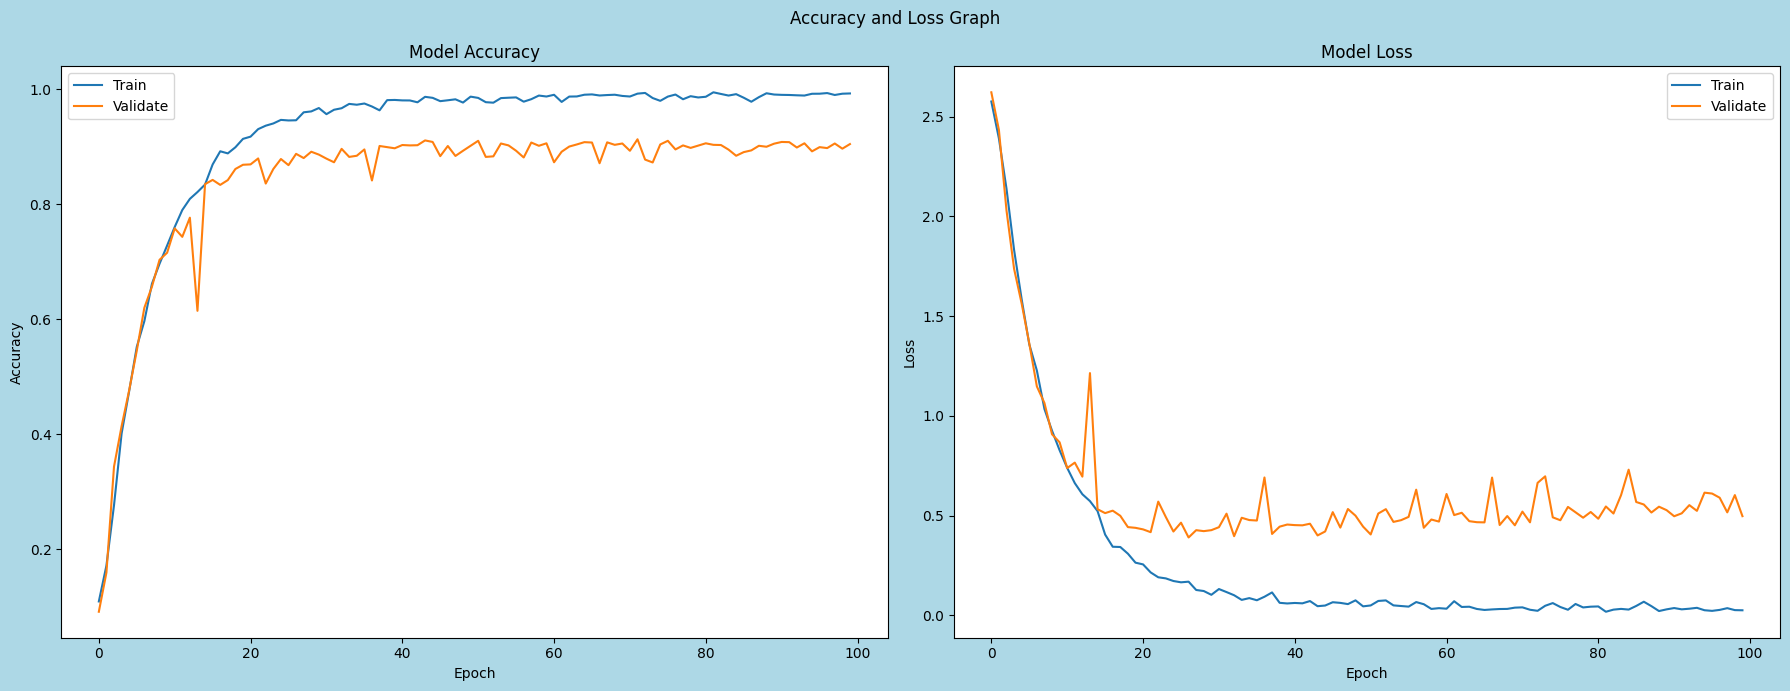

In [90]:
# Model 2
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(31,31,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train,y_train, validation_data=(X_val,y_val),epochs=100, batch_size=128)

scores = model.evaluate(X_test,y_test)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
plotAUC(history)

### Global Average Pooling

Epoch 1/100
71/71 [==============================] - 2s 13ms/step - loss: 2.5727 - accuracy: 0.1133 - val_loss: 2.5601 - val_accuracy: 0.0987
Epoch 2/100
71/71 [==============================] - 1s 10ms/step - loss: 2.3683 - accuracy: 0.1739 - val_loss: 2.5317 - val_accuracy: 0.1503
Epoch 3/100
71/71 [==============================] - 1s 10ms/step - loss: 2.2249 - accuracy: 0.2386 - val_loss: 2.1942 - val_accuracy: 0.2673
Epoch 4/100
71/71 [==============================] - 1s 10ms/step - loss: 2.0057 - accuracy: 0.3255 - val_loss: 2.0317 - val_accuracy: 0.2873
Epoch 5/100
71/71 [==============================] - 1s 10ms/step - loss: 1.8126 - accuracy: 0.3959 - val_loss: 1.9239 - val_accuracy: 0.3480
Epoch 6/100
71/71 [==============================] - 1s 10ms/step - loss: 1.6122 - accuracy: 0.4622 - val_loss: 1.5566 - val_accuracy: 0.4693
Epoch 7/100
71/71 [==============================] - 1s 10ms/step - loss: 1.4663 - accuracy: 0.5112 - val_loss: 1.4411 - val_accuracy: 0.5280
Epoch 

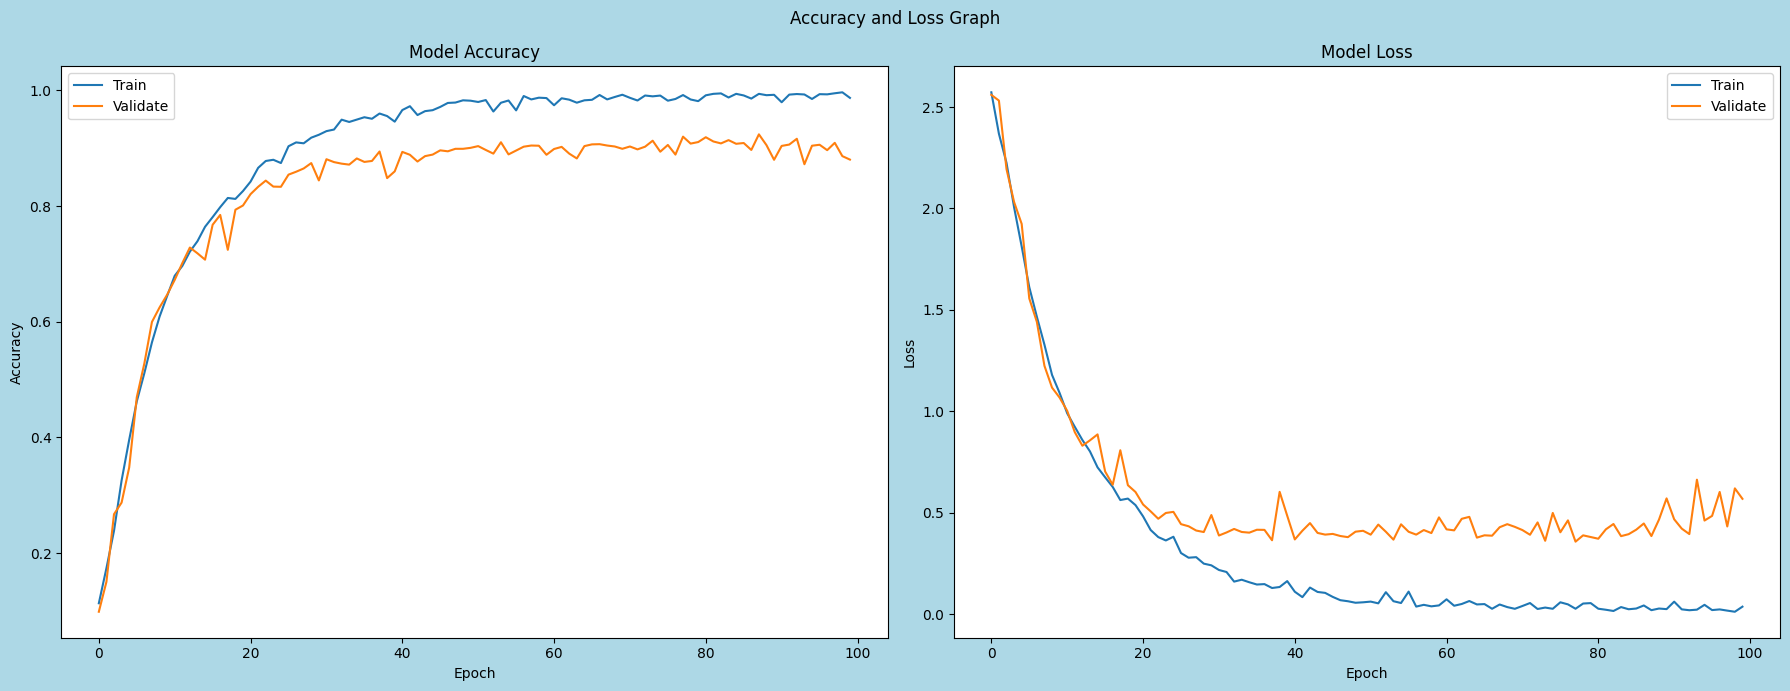

In [91]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(31,31,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(GlobalAveragePooling2D())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(15,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train,y_train, validation_data=(X_val,y_val),epochs=100, batch_size=128)

scores = model.evaluate(X_test,y_test)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
plotAUC(history)

### It can be seen that the model is performing better with Flatten. Hence we will use Flatten instead of GlobalAveragePooling

### The model is overfitting hence we will now explore options (Kernal Regularizer and Dropout) to mitigate this issue.

### Dropout was introduced to assess whether it has a positive impact on curbing the overfitting issue.

Epoch 1/100
71/71 [==============================] - 2s 13ms/step - loss: 2.6128 - accuracy: 0.1049 - val_loss: 2.6860 - val_accuracy: 0.0830
Epoch 2/100
71/71 [==============================] - 1s 10ms/step - loss: 2.4505 - accuracy: 0.1496 - val_loss: 2.4580 - val_accuracy: 0.1843
Epoch 3/100
71/71 [==============================] - 1s 10ms/step - loss: 2.2909 - accuracy: 0.2119 - val_loss: 2.2156 - val_accuracy: 0.2617
Epoch 4/100
71/71 [==============================] - 1s 10ms/step - loss: 2.0178 - accuracy: 0.3309 - val_loss: 1.8818 - val_accuracy: 0.3957
Epoch 5/100
71/71 [==============================] - 1s 10ms/step - loss: 1.7980 - accuracy: 0.4023 - val_loss: 1.6759 - val_accuracy: 0.4537
Epoch 6/100
71/71 [==============================] - 1s 11ms/step - loss: 1.5902 - accuracy: 0.4735 - val_loss: 1.4320 - val_accuracy: 0.5333
Epoch 7/100
71/71 [==============================] - 1s 11ms/step - loss: 1.4324 - accuracy: 0.5274 - val_loss: 1.2522 - val_accuracy: 0.6043
Epoch 

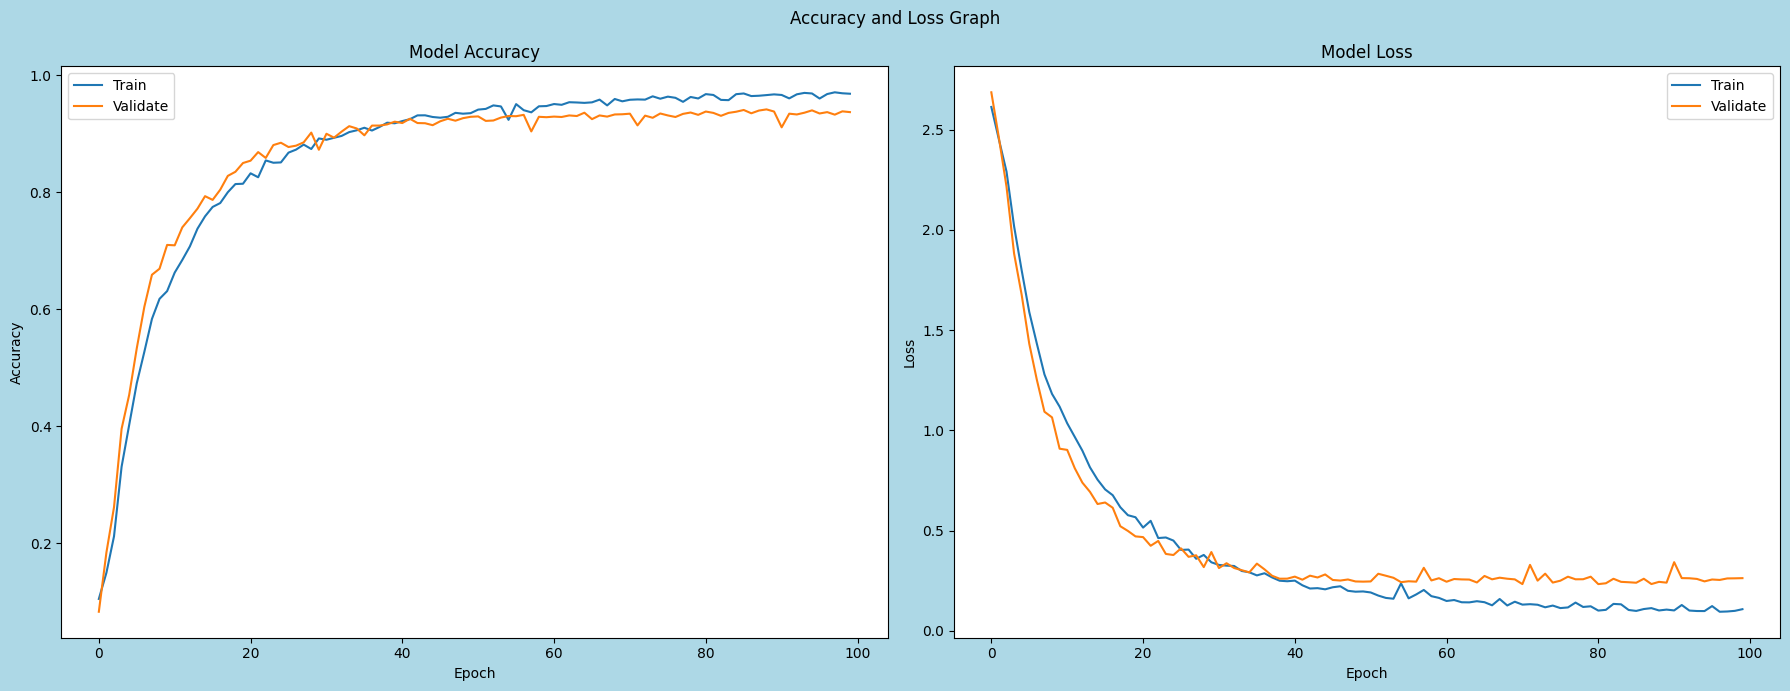

In [92]:
# Model 2
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(31,31,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train,y_train, validation_data=(X_val,y_val),epochs=100, batch_size=128)
model.save_weights("./CNN Weights (31 by 31)/model2.h5")
scores = model.evaluate(X_test,y_test)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
plotAUC(history)

In [93]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_81 (Conv2D)          (None, 29, 29, 64)        640       
                                                                 
 max_pooling2d_75 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 dropout_73 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_82 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_76 (MaxPoolin  (None, 6, 6, 128)        0         
 g2D)                                                            
                                                                 
 dropout_74 (Dropout)        (None, 6, 6, 128)       

## Load Model 2

In [94]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(31,31,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.load_weights("./CNN Weights (31 by 31)/model2.h5")

### After incorporating dropout to my layers, there is an increase in both the train and validation accuracy sugesting a positive impact. I will now experiment with different dropout values to determine the optimal value.


## Model 3 (31 x 31)

### Model 3 will be a deeper model with stacked layers

Epoch 1/100
71/71 [==============================] - 2s 18ms/step - loss: 2.6207 - accuracy: 0.0944 - val_loss: 2.6193 - val_accuracy: 0.0917
Epoch 2/100
71/71 [==============================] - 1s 15ms/step - loss: 2.4700 - accuracy: 0.1455 - val_loss: 2.4935 - val_accuracy: 0.1490
Epoch 3/100
71/71 [==============================] - 1s 15ms/step - loss: 2.2904 - accuracy: 0.2118 - val_loss: 2.1756 - val_accuracy: 0.2997
Epoch 4/100
71/71 [==============================] - 1s 15ms/step - loss: 2.0616 - accuracy: 0.3115 - val_loss: 1.9531 - val_accuracy: 0.3847
Epoch 5/100
71/71 [==============================] - 1s 15ms/step - loss: 1.8308 - accuracy: 0.3989 - val_loss: 1.6051 - val_accuracy: 0.4760
Epoch 6/100
71/71 [==============================] - 1s 15ms/step - loss: 1.6224 - accuracy: 0.4739 - val_loss: 1.5053 - val_accuracy: 0.4833
Epoch 7/100
71/71 [==============================] - 1s 15ms/step - loss: 1.4859 - accuracy: 0.5130 - val_loss: 1.4160 - val_accuracy: 0.5277
Epoch 

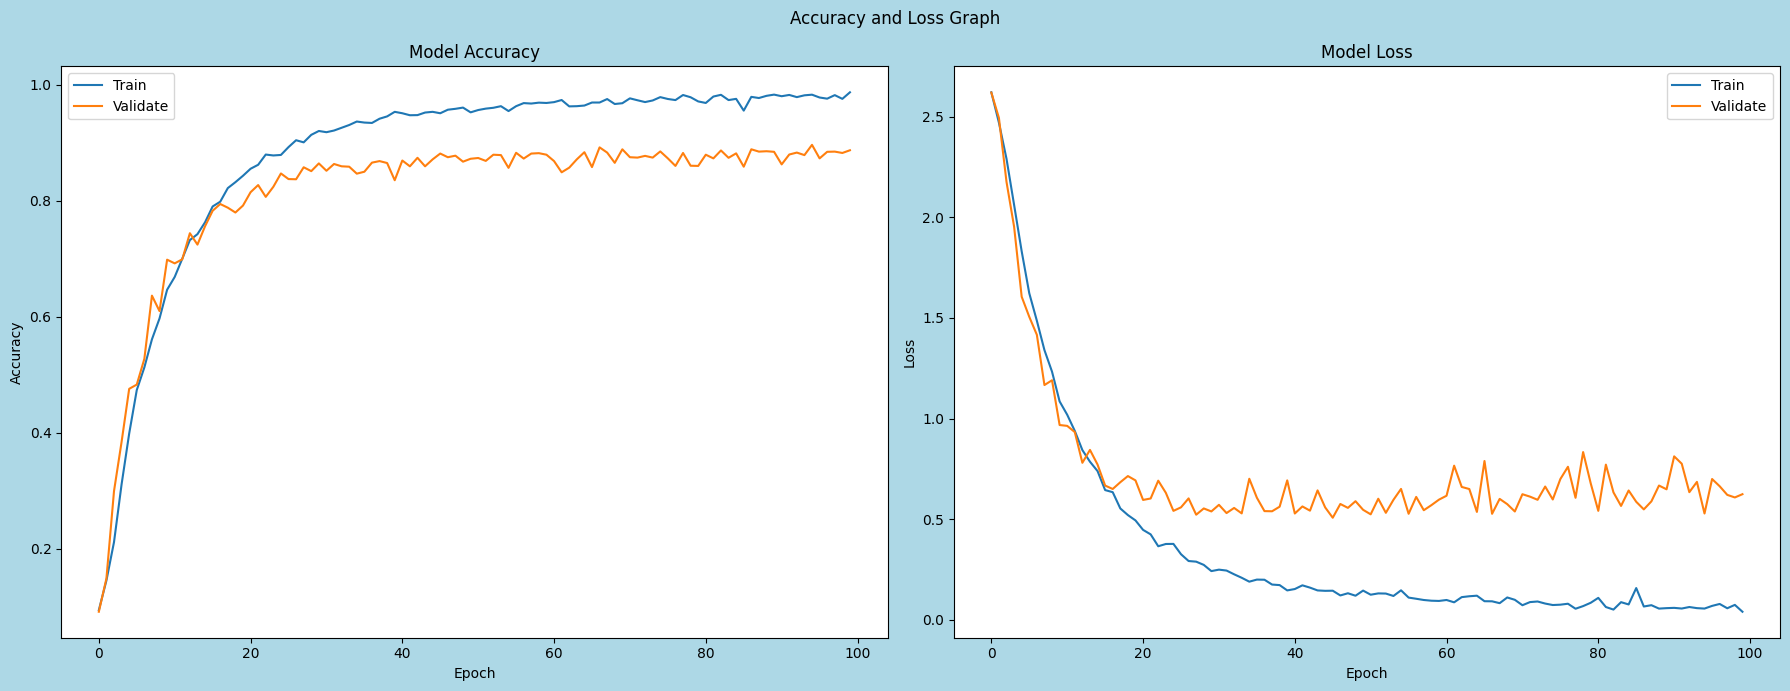

In [95]:
# Model 3
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(31,31,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train,y_train, validation_data=(X_val,y_val),epochs=100, batch_size=128)

scores = model.evaluate(X_test,y_test)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
plotAUC(history)

### It can be seen that the model is overfitting. The model is performing very well on train data but its validation loss is increasing.<br>Hence, we will incorporate dropout into our layer to curb overfitting.

Epoch 1/100
71/71 [==============================] - 2s 19ms/step - loss: 2.6320 - accuracy: 0.0940 - val_loss: 2.6084 - val_accuracy: 0.0873
Epoch 2/100
71/71 [==============================] - 1s 16ms/step - loss: 2.4762 - accuracy: 0.1469 - val_loss: 2.3811 - val_accuracy: 0.2037
Epoch 3/100
71/71 [==============================] - 1s 16ms/step - loss: 2.2667 - accuracy: 0.2335 - val_loss: 2.1768 - val_accuracy: 0.2717
Epoch 4/100
71/71 [==============================] - 1s 15ms/step - loss: 2.0840 - accuracy: 0.3070 - val_loss: 1.9407 - val_accuracy: 0.3510
Epoch 5/100
71/71 [==============================] - 1s 16ms/step - loss: 1.8628 - accuracy: 0.3842 - val_loss: 1.7501 - val_accuracy: 0.4310
Epoch 6/100
71/71 [==============================] - 1s 16ms/step - loss: 1.6890 - accuracy: 0.4438 - val_loss: 1.4952 - val_accuracy: 0.5113
Epoch 7/100
71/71 [==============================] - 1s 16ms/step - loss: 1.5292 - accuracy: 0.4992 - val_loss: 1.3468 - val_accuracy: 0.5513
Epoch 

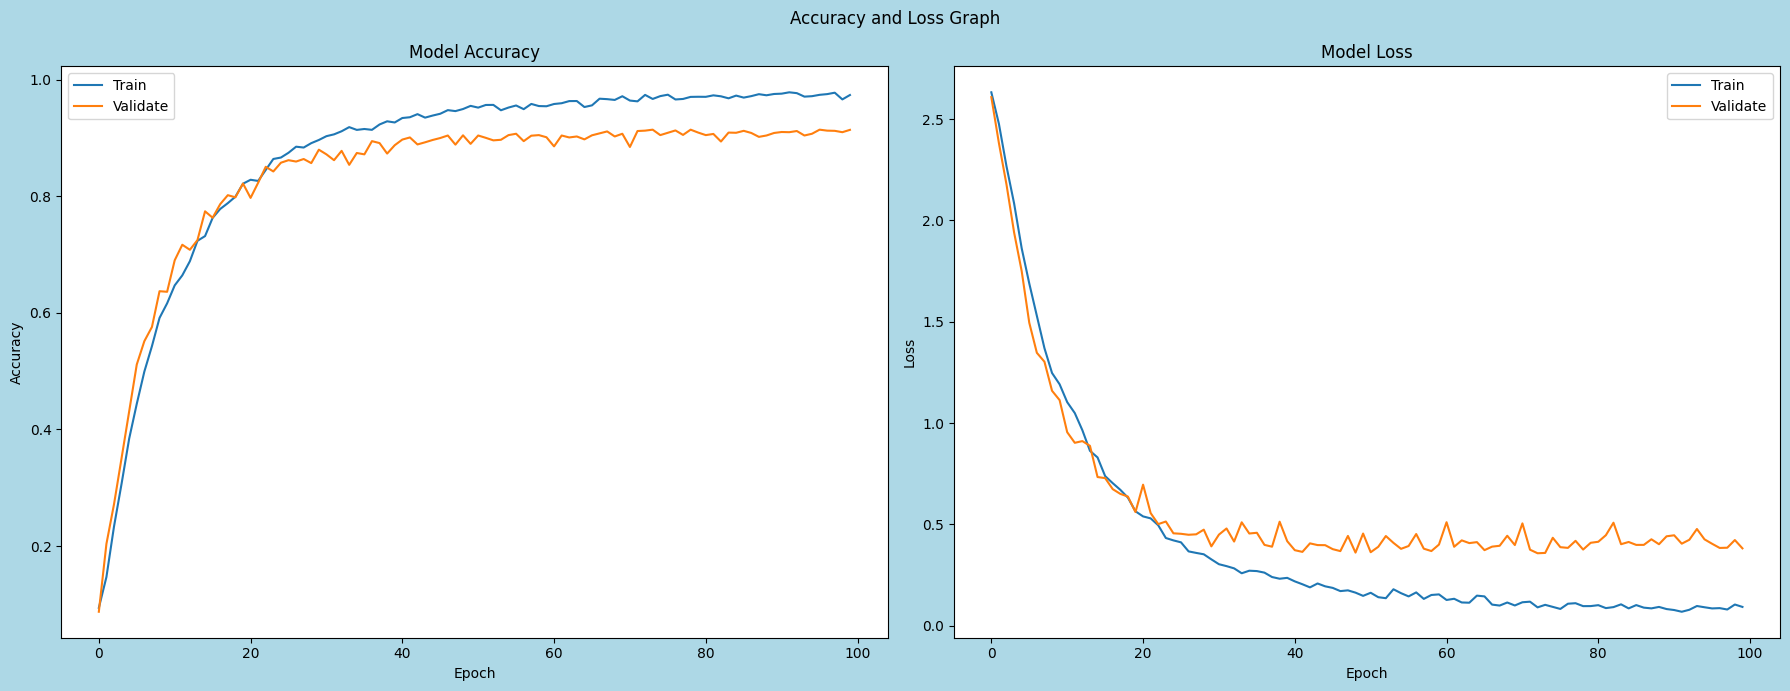

In [96]:
# Model 3
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(31,31,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train,y_train, validation_data=(X_val,y_val),epochs=100, batch_size=128)
model.save_weights("./CNN Weights (31 by 31)/model3.h5")
scores = model.evaluate(X_test,y_test)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
plotAUC(history)

In [97]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_88 (Conv2D)          (None, 29, 29, 64)        640       
                                                                 
 conv2d_89 (Conv2D)          (None, 27, 27, 64)        36928     
                                                                 
 max_pooling2d_80 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 dropout_80 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 conv2d_90 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 conv2d_91 (Conv2D)          (None, 9, 9, 128)         147584    
                                                     

## Load Model 3

In [98]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(31,31,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.load_weights("./CNN Weights (31 by 31)/model3.h5")

### From the scores, I will choose Model 2 and Model 3 to further improve it due to its high test and validation accuracy scores

## Data Augmentation

### For augmentation we will add horizontal RandomFlip and GaussianNoise and assess it separately

### Model 2 (Before Augmentation)

Epoch 1/100
71/71 [==============================] - 2s 13ms/step - loss: 2.6077 - accuracy: 0.1030 - val_loss: 2.6207 - val_accuracy: 0.1020
Epoch 2/100
71/71 [==============================] - 1s 10ms/step - loss: 2.4655 - accuracy: 0.1477 - val_loss: 2.4488 - val_accuracy: 0.1523
Epoch 3/100
71/71 [==============================] - 1s 11ms/step - loss: 2.2717 - accuracy: 0.2200 - val_loss: 2.1590 - val_accuracy: 0.3030
Epoch 4/100
71/71 [==============================] - 1s 10ms/step - loss: 2.0455 - accuracy: 0.3140 - val_loss: 1.8235 - val_accuracy: 0.4113
Epoch 5/100
71/71 [==============================] - 1s 10ms/step - loss: 1.7305 - accuracy: 0.4309 - val_loss: 1.5823 - val_accuracy: 0.4700
Epoch 6/100
71/71 [==============================] - 1s 10ms/step - loss: 1.4929 - accuracy: 0.5078 - val_loss: 1.3519 - val_accuracy: 0.5540
Epoch 7/100
71/71 [==============================] - 1s 10ms/step - loss: 1.3897 - accuracy: 0.5474 - val_loss: 1.2367 - val_accuracy: 0.5913
Epoch 

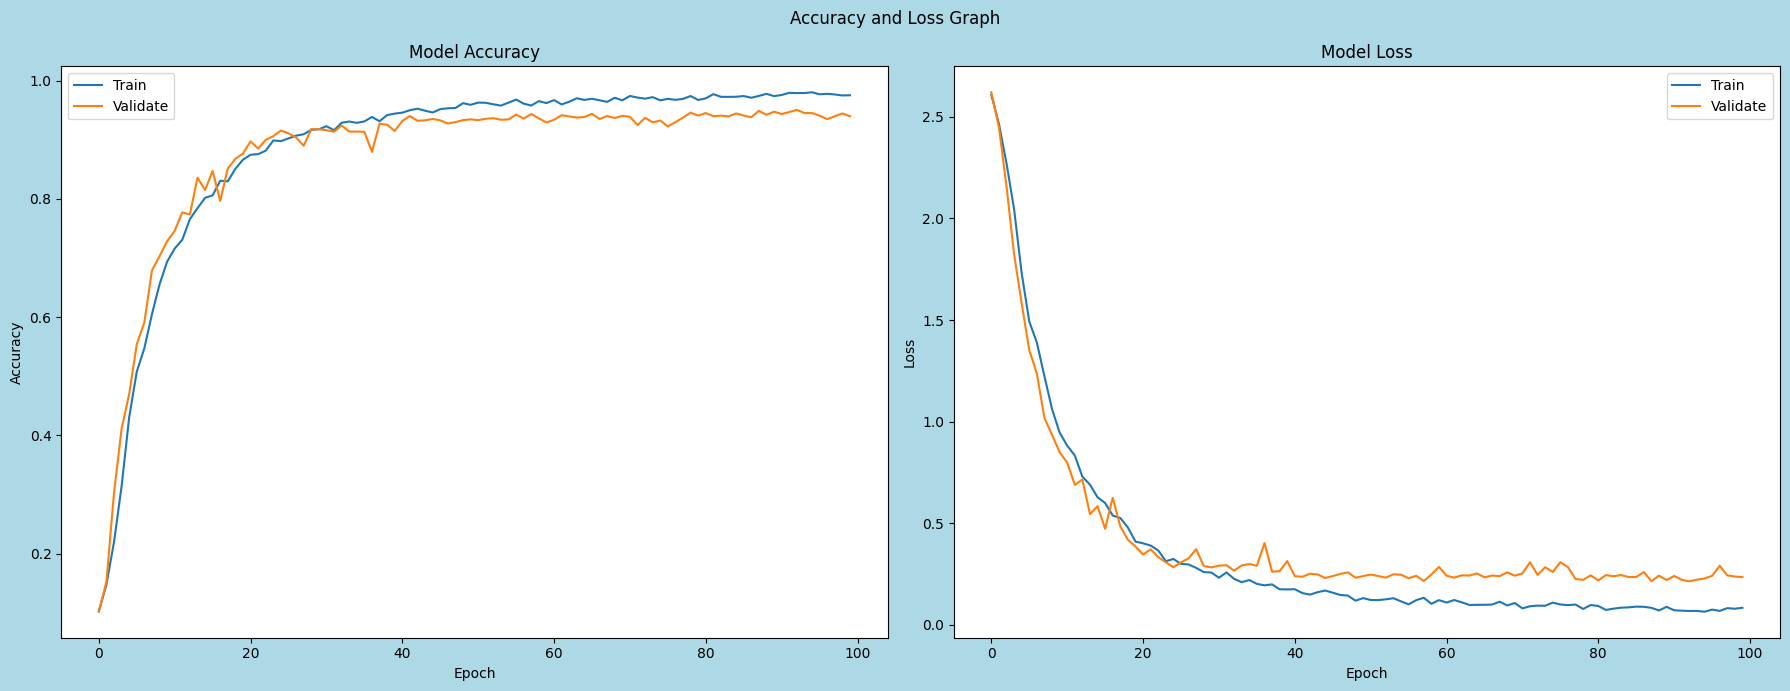

In [99]:
# Model 2
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(31,31,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train,y_train, validation_data=(X_val,y_val),epochs=100, batch_size=128)

scores = model.evaluate(X_test,y_test)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
plotAUC(history)

### Model 2 (After Augmentation) - Random Flip

Epoch 1/100
71/71 [==============================] - 4s 41ms/step - loss: 2.6033 - accuracy: 0.1029 - val_loss: 2.6752 - val_accuracy: 0.0870
Epoch 2/100
71/71 [==============================] - 3s 45ms/step - loss: 2.4957 - accuracy: 0.1320 - val_loss: 2.4555 - val_accuracy: 0.1507
Epoch 3/100
71/71 [==============================] - 3s 46ms/step - loss: 2.2966 - accuracy: 0.2080 - val_loss: 2.1820 - val_accuracy: 0.2750
Epoch 4/100
71/71 [==============================] - 3s 46ms/step - loss: 2.0103 - accuracy: 0.3294 - val_loss: 1.9075 - val_accuracy: 0.3607
Epoch 5/100
71/71 [==============================] - 3s 47ms/step - loss: 1.7545 - accuracy: 0.4178 - val_loss: 1.5676 - val_accuracy: 0.4917
Epoch 6/100
71/71 [==============================] - 3s 47ms/step - loss: 1.5161 - accuracy: 0.4994 - val_loss: 1.3387 - val_accuracy: 0.5650
Epoch 7/100
71/71 [==============================] - 3s 46ms/step - loss: 1.3109 - accuracy: 0.5682 - val_loss: 1.0984 - val_accuracy: 0.6510
Epoch 

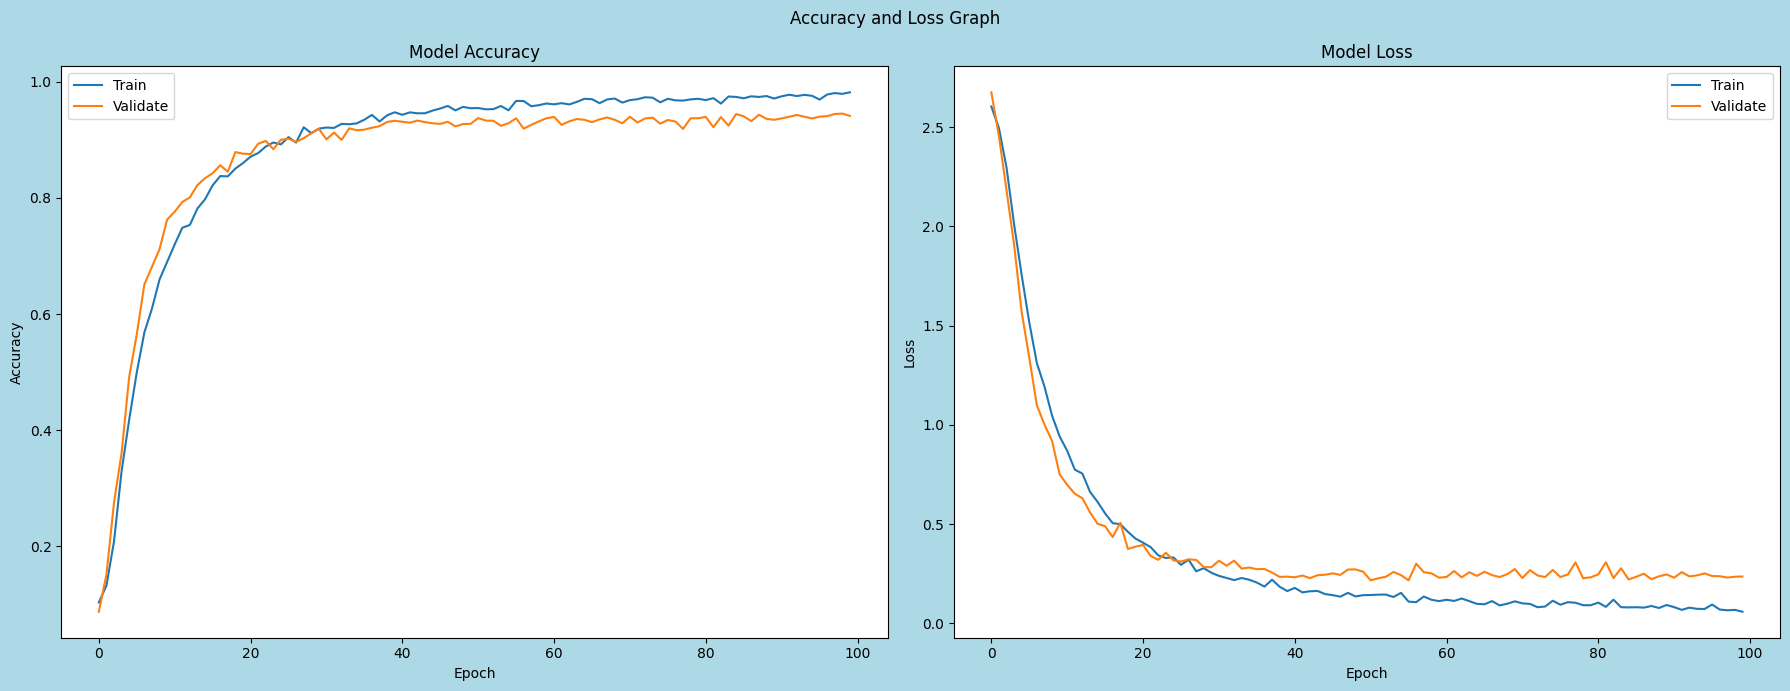

In [102]:
# Model 2
model = Sequential()
model.add(RandomFlip('horizontal',input_shape=(31,31,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train,y_train, validation_data=(X_val,y_val),epochs=100, batch_size=128)

scores = model.evaluate(X_test,y_test)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
plotAUC(history)

### The accuracy is about the same upon adding RandomFlip, hence we will not implement it.

### Model 2 (After Augmentation) - Gaussian Noise

Epoch 1/100
71/71 [==============================] - 2s 15ms/step - loss: 2.6499 - accuracy: 0.0953 - val_loss: 2.7074 - val_accuracy: 0.0677
Epoch 2/100
71/71 [==============================] - 1s 10ms/step - loss: 2.5694 - accuracy: 0.1253 - val_loss: 2.6990 - val_accuracy: 0.1160
Epoch 3/100
71/71 [==============================] - 1s 10ms/step - loss: 2.4079 - accuracy: 0.2069 - val_loss: 2.6327 - val_accuracy: 0.1360
Epoch 4/100
71/71 [==============================] - 1s 11ms/step - loss: 2.2392 - accuracy: 0.2573 - val_loss: 2.5746 - val_accuracy: 0.1703
Epoch 5/100
71/71 [==============================] - 1s 11ms/step - loss: 2.1382 - accuracy: 0.2995 - val_loss: 2.5190 - val_accuracy: 0.2170
Epoch 6/100
71/71 [==============================] - 1s 10ms/step - loss: 2.0552 - accuracy: 0.3291 - val_loss: 2.4883 - val_accuracy: 0.2187
Epoch 7/100
71/71 [==============================] - 1s 11ms/step - loss: 2.0008 - accuracy: 0.3499 - val_loss: 2.5492 - val_accuracy: 0.1940
Epoch 

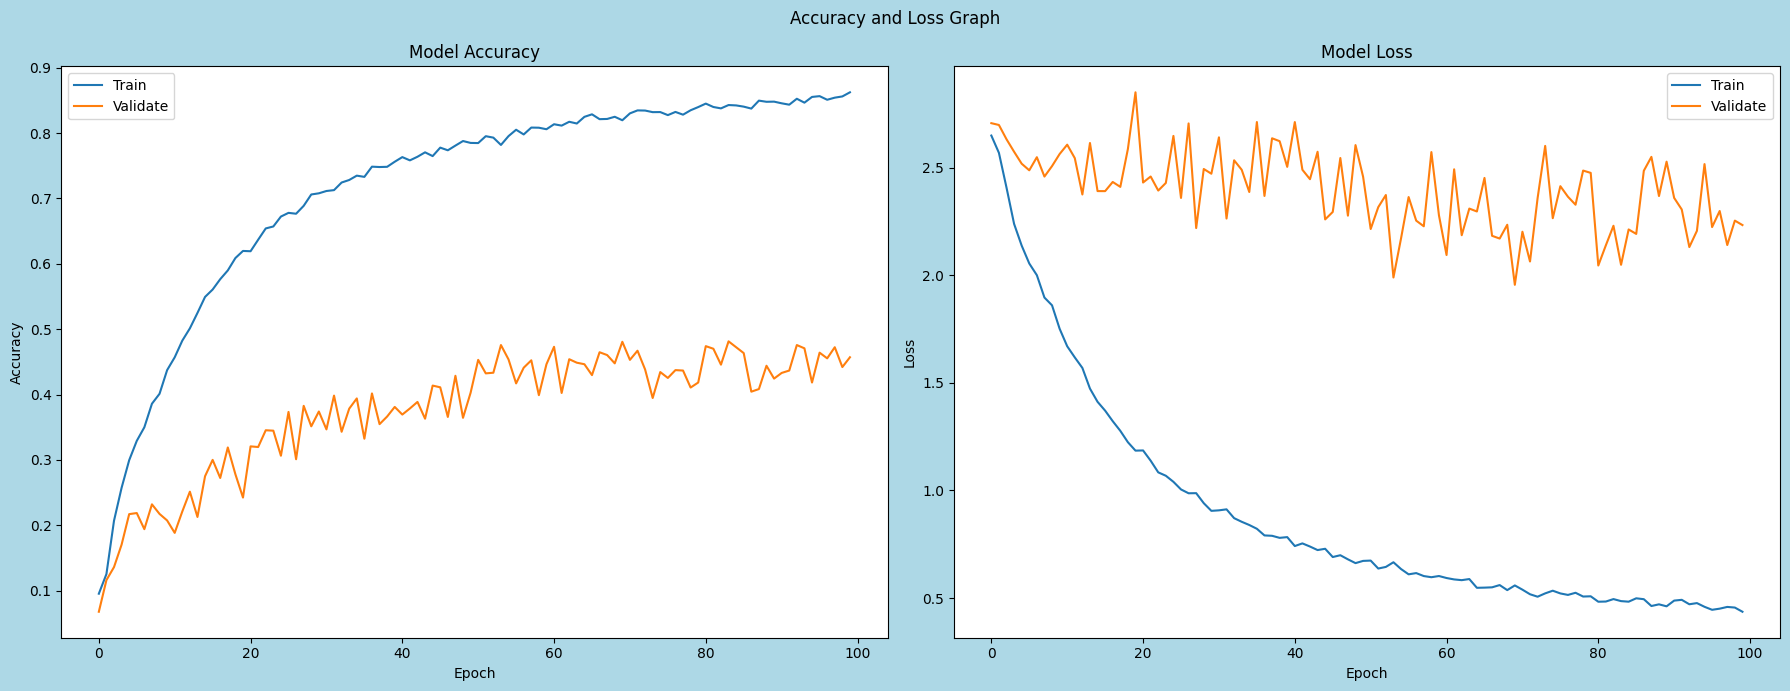

In [105]:
# Model 2
from tensorflow.keras.layers.experimental.preprocessing import Rescaling,RandomFlip
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D,GlobalAveragePooling2D,GaussianNoise
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, BatchNormalization
from tensorflow.keras import regularizers
model = Sequential()
model.add(GaussianNoise(0.2,input_shape=(31,31,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train,y_train, validation_data=(X_val,y_val),epochs=100, batch_size=128)

scores = model.evaluate(X_test,y_test)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
plotAUC(history)

### Gaussian Noise decreased my accuracy score significantly,hence we will not implement it.

### Model 3 (Before Augmentation)

Epoch 1/100
71/71 [==============================] - 2s 19ms/step - loss: 2.6266 - accuracy: 0.0991 - val_loss: 2.6006 - val_accuracy: 0.0883
Epoch 2/100
71/71 [==============================] - 1s 16ms/step - loss: 2.4684 - accuracy: 0.1380 - val_loss: 2.3833 - val_accuracy: 0.1877
Epoch 3/100
71/71 [==============================] - 1s 16ms/step - loss: 2.3142 - accuracy: 0.2017 - val_loss: 2.2416 - val_accuracy: 0.2497
Epoch 4/100
71/71 [==============================] - 1s 16ms/step - loss: 2.1313 - accuracy: 0.2815 - val_loss: 2.0285 - val_accuracy: 0.3077
Epoch 5/100
71/71 [==============================] - 1s 16ms/step - loss: 1.9239 - accuracy: 0.3514 - val_loss: 1.7508 - val_accuracy: 0.4243
Epoch 6/100
71/71 [==============================] - 1s 16ms/step - loss: 1.7304 - accuracy: 0.4341 - val_loss: 1.5757 - val_accuracy: 0.4863
Epoch 7/100
71/71 [==============================] - 1s 16ms/step - loss: 1.5829 - accuracy: 0.4757 - val_loss: 1.4351 - val_accuracy: 0.5303
Epoch 

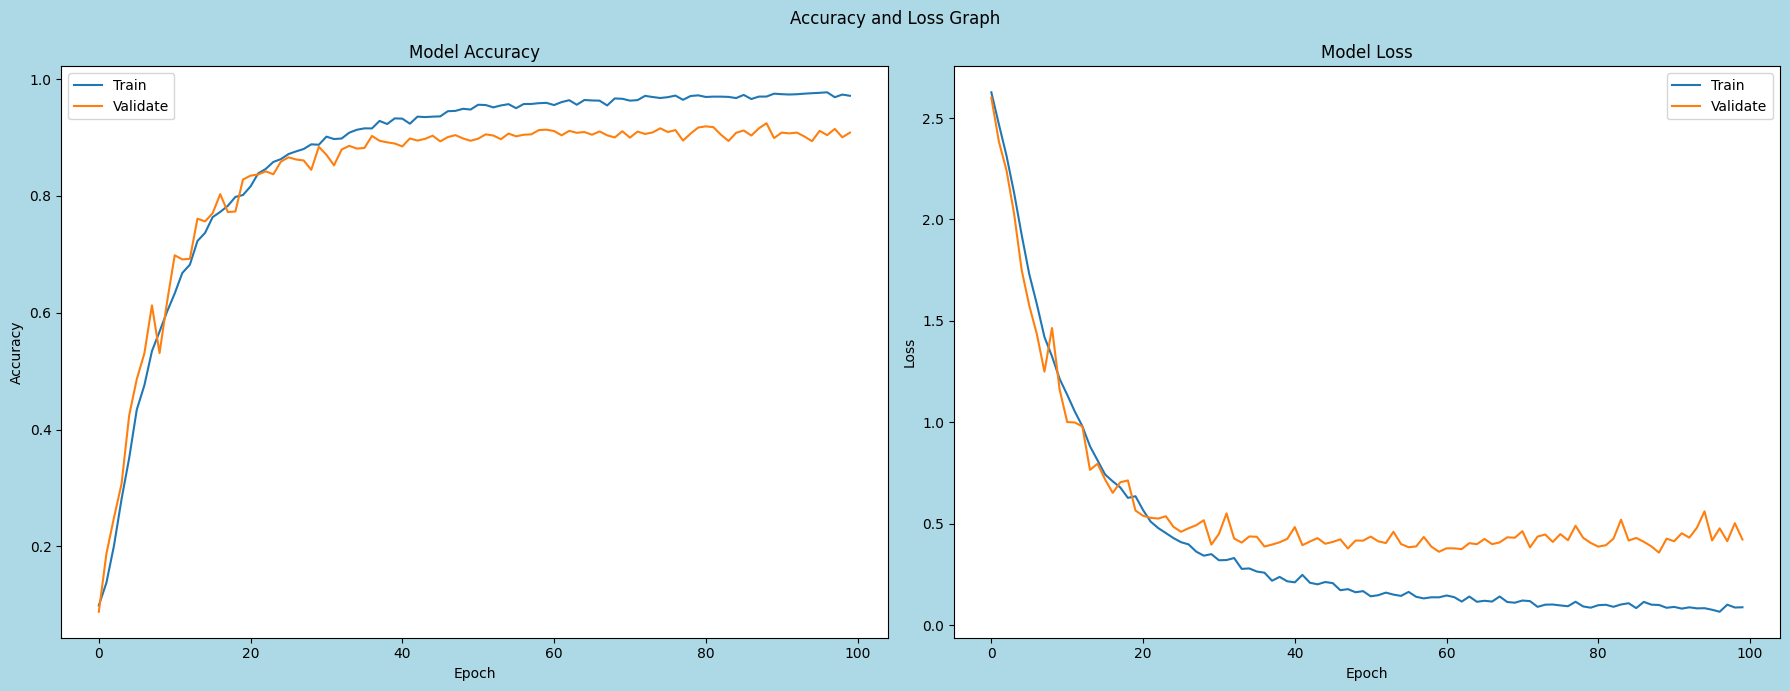

In [106]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(31,31,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train,y_train, validation_data=(X_val,y_val),epochs=100, batch_size=128)

scores = model.evaluate(X_test,y_test)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
plotAUC(history)

### Model 3 (After Augmentation) - Random Flip

Epoch 1/100
71/71 [==============================] - 4s 46ms/step - loss: 2.6266 - accuracy: 0.0918 - val_loss: 2.6407 - val_accuracy: 0.0737
Epoch 2/100
71/71 [==============================] - 3s 46ms/step - loss: 2.5095 - accuracy: 0.1220 - val_loss: 2.4914 - val_accuracy: 0.1727
Epoch 3/100
71/71 [==============================] - 3s 44ms/step - loss: 2.3833 - accuracy: 0.1704 - val_loss: 2.4436 - val_accuracy: 0.1750
Epoch 4/100
71/71 [==============================] - 3s 44ms/step - loss: 2.2263 - accuracy: 0.2424 - val_loss: 2.1463 - val_accuracy: 0.3110
Epoch 5/100
71/71 [==============================] - 3s 44ms/step - loss: 2.0530 - accuracy: 0.3074 - val_loss: 1.8839 - val_accuracy: 0.3757
Epoch 6/100
71/71 [==============================] - 3s 43ms/step - loss: 1.8097 - accuracy: 0.4065 - val_loss: 1.7414 - val_accuracy: 0.4307
Epoch 7/100
71/71 [==============================] - 3s 45ms/step - loss: 1.6570 - accuracy: 0.4578 - val_loss: 1.5570 - val_accuracy: 0.4907
Epoch 

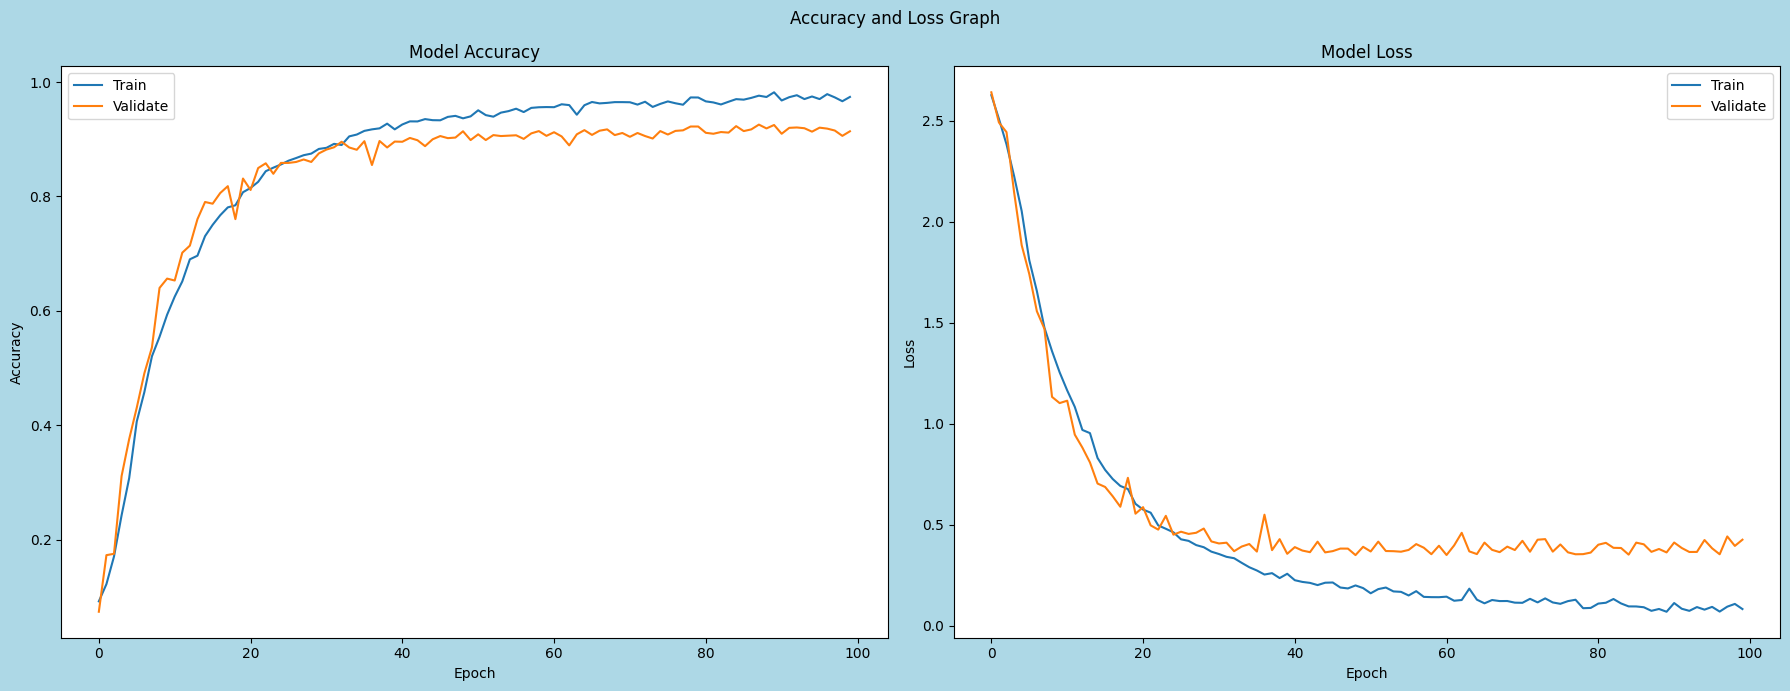

In [107]:
# Model 2 Comments 
# Reduce Dropout
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, BatchNormalization
from tensorflow.keras import regularizers
model = Sequential()
model.add(RandomFlip('horizontal',input_shape=(31,31,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train,y_train, validation_data=(X_val,y_val),epochs=100, batch_size=128)

scores = model.evaluate(X_test,y_test)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
plotAUC(history)

### Random Flip improved model 3 accuracy by only 1%, however the training time has also increased x2 times. Upon weighing the trade off between time and accuracy, we will not implement it.

### From the results above, data augmentation is not as effective. Thus we will not implement it

## Model Improvement

### We will further improve model 2 as it has a higher test and validation accuracy than model 3<br><br>1.Compare Activation Functions<br>2. Tuning Hyper-parameters

In [108]:
def getModel(activation):
    model = Sequential()

    model.add(Conv2D(64, (3, 3), activation=activation,input_shape=(31,31,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), activation=activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(256, (3, 3), activation=activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))


    model.add(Flatten())

    model.add(Dense(512, activation=activation))
    model.add(Dropout(0.5))

    model.add(Dense(256, activation=activation))
    model.add(Dropout(0.5))

    model.add(Dense(15,activation='softmax'))
    return model

### Comparing Activation Functions

In [109]:
activations = ['elu','tanh','relu','sigmoid']

results = {}

for function in activations:
    model = getModel(function)
    model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train,y_train, validation_data=(X_val,y_val),epochs=100, batch_size=128)
    results[function] = history

Epoch 1/100
71/71 [==============================] - 2s 15ms/step - loss: 2.3924 - accuracy: 0.2054 - val_loss: 2.2632 - val_accuracy: 0.2643
Epoch 2/100
71/71 [==============================] - 1s 11ms/step - loss: 1.8901 - accuracy: 0.3907 - val_loss: 1.9283 - val_accuracy: 0.3507
Epoch 3/100
71/71 [==============================] - 1s 11ms/step - loss: 1.6325 - accuracy: 0.4761 - val_loss: 1.6765 - val_accuracy: 0.4513
Epoch 4/100
71/71 [==============================] - 1s 11ms/step - loss: 1.4567 - accuracy: 0.5349 - val_loss: 1.3882 - val_accuracy: 0.5610
Epoch 5/100
71/71 [==============================] - 1s 11ms/step - loss: 1.2877 - accuracy: 0.5894 - val_loss: 1.1759 - val_accuracy: 0.6337
Epoch 6/100
71/71 [==============================] - 1s 11ms/step - loss: 1.1639 - accuracy: 0.6269 - val_loss: 1.0768 - val_accuracy: 0.6657
Epoch 7/100
71/71 [==============================] - 1s 10ms/step - loss: 1.0696 - accuracy: 0.6535 - val_loss: 0.9181 - val_accuracy: 0.7083
Epoch 

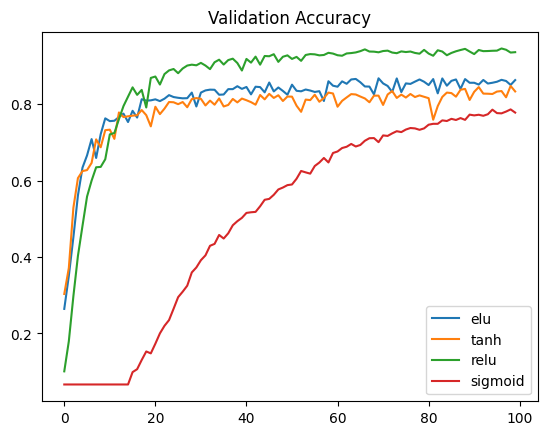

In [110]:
valLost = {k:v.history['val_accuracy'] for k,v in results.items()}
valLostCurve = pd.DataFrame(valLost)
valLostCurve.plot()
plt.title('Validation Accuracy')
plt.show()

### From the validation accuracy graph, relu performed the best. We will use relu as our activation

### Hyper-parameter tuning

In [113]:
def createModel(optimizer,dropout):
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(31,31,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout))

    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout))


    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(15,activation='softmax'))

    model.compile(loss='categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'])
    return model

In [114]:
model = KerasClassifier(build_fn=createModel,epochs=100,batch_size=128)
paramGrid = {'optimizer':['adam','rmsprop','nadam'],'dropout':[0.2,0.3,0.4]}
randomSearch = RandomizedSearchCV(model,param_distributions = paramGrid, cv=3)
randomSearchRes = randomSearch.fit(X_train,y_train)
print(f"Best Score: {randomSearchRes.best_score_} Best Params: {randomSearchRes.best_params_}")

Epoch 1/100


C:\Users\kieny\AppData\Local\Temp\ipykernel_43868\2954678440.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=createModel,epochs=100,batch_size=128)


48/48 [==============================] - 1s 12ms/step - loss: 2.6302 - accuracy: 0.0869
Epoch 2/100
48/48 [==============================] - 0s 9ms/step - loss: 2.5294 - accuracy: 0.1190
Epoch 3/100
48/48 [==============================] - 0s 9ms/step - loss: 2.4299 - accuracy: 0.1544
Epoch 4/100
48/48 [==============================] - 0s 9ms/step - loss: 2.3194 - accuracy: 0.2036
Epoch 5/100
48/48 [==============================] - 0s 9ms/step - loss: 2.2720 - accuracy: 0.2434
Epoch 6/100
48/48 [==============================] - 0s 9ms/step - loss: 2.0877 - accuracy: 0.3038
Epoch 7/100
48/48 [==============================] - 0s 9ms/step - loss: 1.8730 - accuracy: 0.3810
Epoch 8/100
48/48 [==============================] - 0s 9ms/step - loss: 1.9382 - accuracy: 0.3735
Epoch 9/100
48/48 [==============================] - 0s 9ms/step - loss: 1.6044 - accuracy: 0.4742
Epoch 10/100
48/48 [==============================] - 0s 9ms/step - loss: 2.1023 - accuracy: 0.3362
Epoch 11/100
48/48 [

Epoch 1/100
71/71 [==============================] - 2s 15ms/step - loss: 2.6241 - accuracy: 0.1059 - val_loss: 2.6571 - val_accuracy: 0.0927
Epoch 2/100
71/71 [==============================] - 1s 11ms/step - loss: 2.5163 - accuracy: 0.1515 - val_loss: 2.5149 - val_accuracy: 0.1707
Epoch 3/100
71/71 [==============================] - 1s 11ms/step - loss: 2.3860 - accuracy: 0.2100 - val_loss: 2.3884 - val_accuracy: 0.2620
Epoch 4/100
71/71 [==============================] - 1s 11ms/step - loss: 2.2219 - accuracy: 0.2633 - val_loss: 2.1408 - val_accuracy: 0.3400
Epoch 5/100
71/71 [==============================] - 1s 12ms/step - loss: 2.0637 - accuracy: 0.3247 - val_loss: 1.9774 - val_accuracy: 0.4063
Epoch 6/100
71/71 [==============================] - 1s 11ms/step - loss: 1.9182 - accuracy: 0.3787 - val_loss: 1.9229 - val_accuracy: 0.3747
Epoch 7/100
71/71 [==============================] - 1s 12ms/step - loss: 1.7745 - accuracy: 0.4339 - val_loss: 2.1766 - val_accuracy: 0.3387
Epoch 

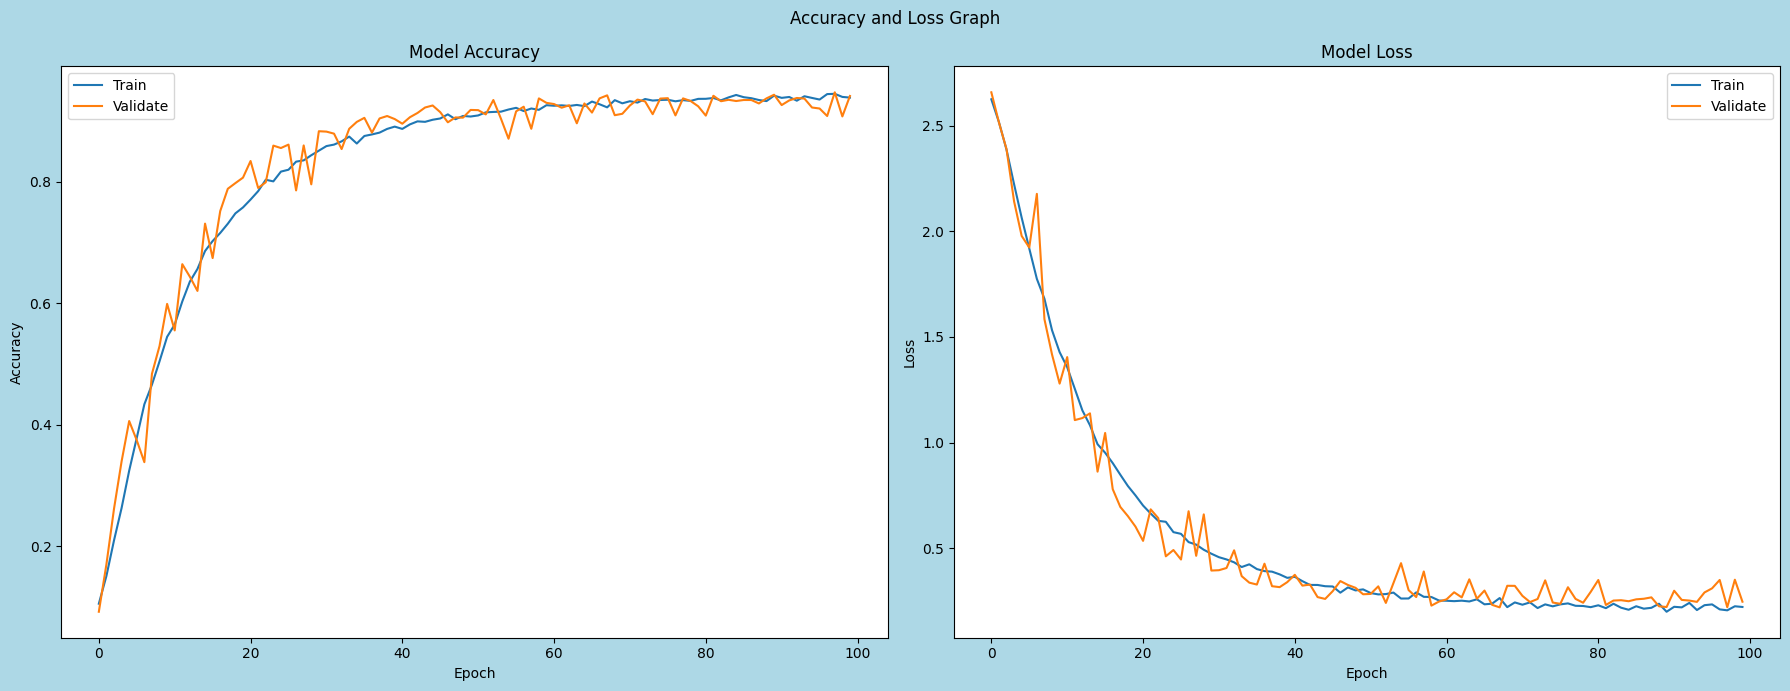

In [115]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduleLR(epoch,lr):
    if epoch<10:
        return lr
    else:
        return lr*tf.math.exp(-0.1)
    
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(31,31,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))


model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(X_train,y_train, validation_data=(X_val,y_val),epochs=100, batch_size=128)
scores = model.evaluate(X_test,y_test)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
plotAUC(history)

### Learning Rate Scheduler

### Now we will add learning rate scheduler to optimize the training and enhance the model's performance

Epoch 1/100
71/71 [==============================] - 2s 14ms/step - loss: 2.6045 - accuracy: 0.1113 - val_loss: 2.6247 - val_accuracy: 0.1013 - lr: 0.0010
Epoch 2/100
71/71 [==============================] - 1s 11ms/step - loss: 2.4992 - accuracy: 0.1512 - val_loss: 2.5132 - val_accuracy: 0.1323 - lr: 0.0010
Epoch 3/100
71/71 [==============================] - 1s 12ms/step - loss: 2.3191 - accuracy: 0.2225 - val_loss: 2.2169 - val_accuracy: 0.2767 - lr: 0.0010
Epoch 4/100
71/71 [==============================] - 1s 11ms/step - loss: 2.1596 - accuracy: 0.2901 - val_loss: 2.1900 - val_accuracy: 0.2933 - lr: 0.0010
Epoch 5/100
71/71 [==============================] - 1s 11ms/step - loss: 2.0032 - accuracy: 0.3463 - val_loss: 2.1145 - val_accuracy: 0.2950 - lr: 0.0010
Epoch 6/100
71/71 [==============================] - 1s 11ms/step - loss: 1.8761 - accuracy: 0.3930 - val_loss: 1.8616 - val_accuracy: 0.3853 - lr: 0.0010
Epoch 7/100
71/71 [==============================] - 1s 11ms/step - lo

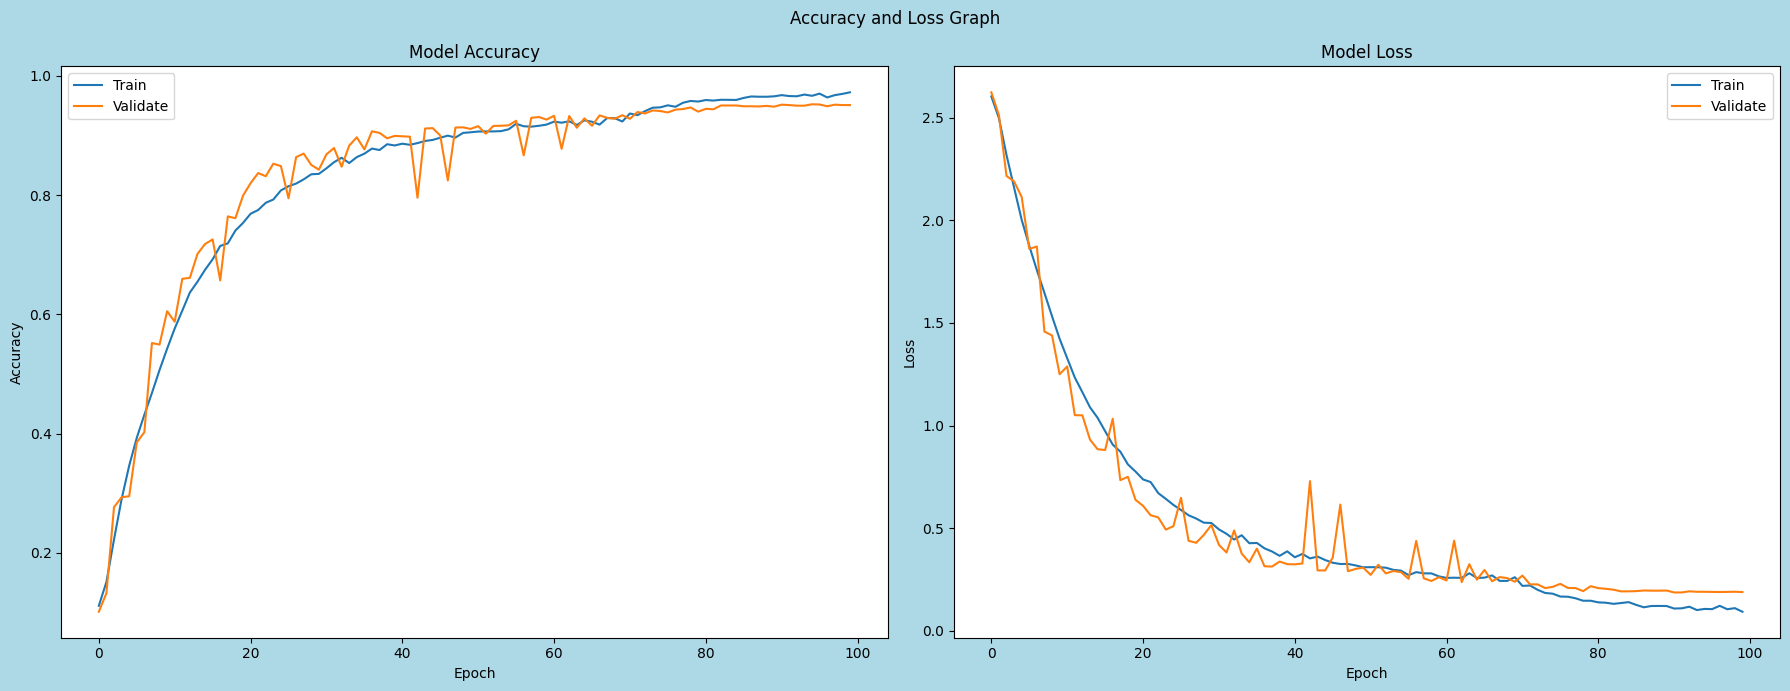

In [121]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduleLR(epoch,lr):
    if epoch<70:
        return lr
    else:
        return lr*tf.math.exp(-0.1)
    
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(31,31,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))


model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])
callback = LearningRateScheduler(scheduleLR)
history = model.fit(X_train,y_train, validation_data=(X_val,y_val),epochs=100, batch_size=128,callbacks=[callback])
scores = model.evaluate(X_test,y_test)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
plotAUC(history)

## Final 31 by 31 Model

Epoch 1/100
71/71 [==============================] - 2s 15ms/step - loss: 2.6146 - accuracy: 0.1058 - val_loss: 2.6575 - val_accuracy: 0.0987 - lr: 0.0010
Epoch 2/100
71/71 [==============================] - 1s 12ms/step - loss: 2.5163 - accuracy: 0.1444 - val_loss: 2.5330 - val_accuracy: 0.1337 - lr: 0.0010
Epoch 3/100
71/71 [==============================] - 1s 11ms/step - loss: 2.3924 - accuracy: 0.1962 - val_loss: 2.3014 - val_accuracy: 0.2720 - lr: 0.0010
Epoch 4/100
71/71 [==============================] - 1s 12ms/step - loss: 2.1782 - accuracy: 0.2807 - val_loss: 2.1067 - val_accuracy: 0.2893 - lr: 0.0010
Epoch 5/100
71/71 [==============================] - 1s 12ms/step - loss: 2.0218 - accuracy: 0.3438 - val_loss: 1.8833 - val_accuracy: 0.3743 - lr: 0.0010
Epoch 6/100
71/71 [==============================] - 1s 11ms/step - loss: 1.9019 - accuracy: 0.3833 - val_loss: 1.7824 - val_accuracy: 0.4147 - lr: 0.0010
Epoch 7/100
71/71 [==============================] - 1s 12ms/step - lo

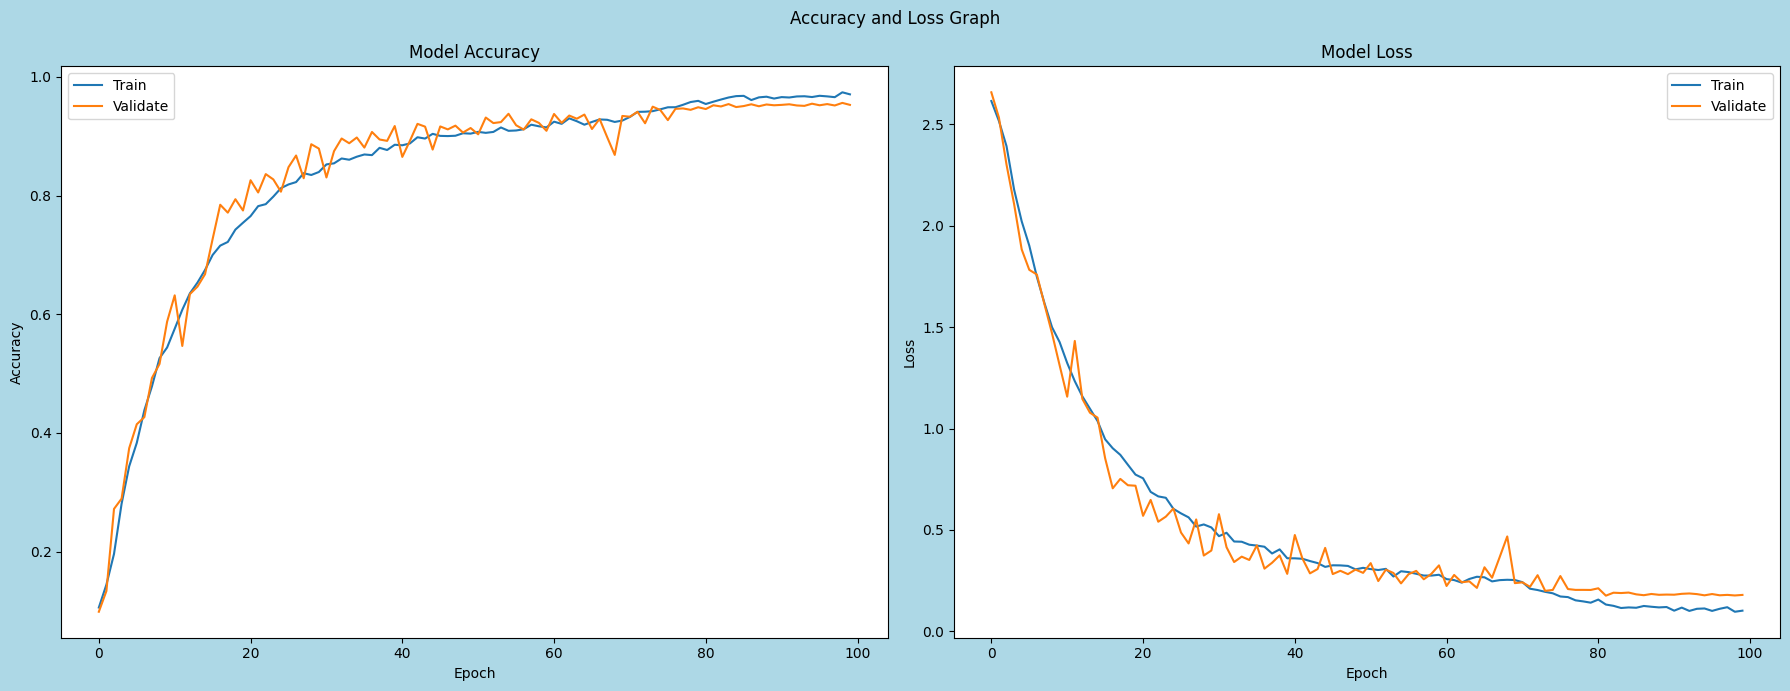

In [124]:
# Model 2
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduleLR(epoch,lr):
    if epoch<70:
        return lr
    else:
        return lr*tf.math.exp(-0.1)
    
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(31,31,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))


model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])
callback = LearningRateScheduler(scheduleLR)
history = model.fit(X_train,y_train, validation_data=(X_val,y_val),epochs=100, batch_size=128,callbacks=[callback])
model.save_weights("./Best Model Weights/bestCNN31by31.h5")
scores = model.evaluate(X_test,y_test)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
plotAUC(history)

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 128)         0

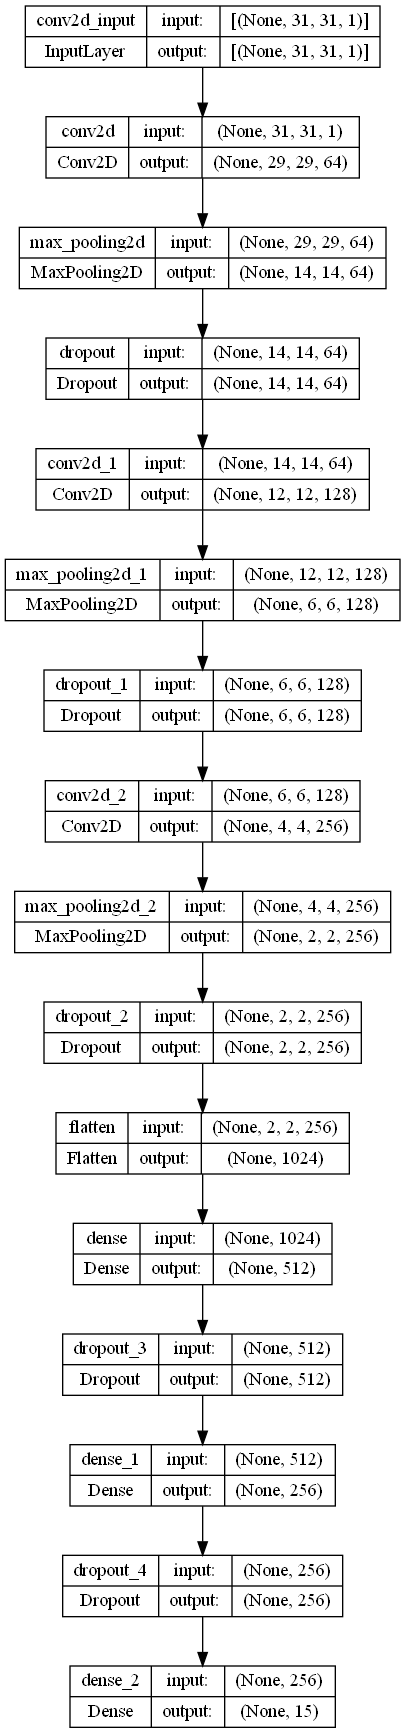

In [3]:
# pip install pydot
# pip install graphviz
# conda install graphviz
# Restart kernal after installation
plot_model(model,show_shapes=True,show_layer_names=True)

## Load Best 31 by 31 Model

In [2]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduleLR(epoch,lr):
    if epoch<70:
        return lr
    else:
        return lr*tf.math.exp(-0.1)
    
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(31,31,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))


model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])
callback = LearningRateScheduler(scheduleLR)
model.load_weights("./Best Model Weights/bestCNN31by31.h5")

## Loading Dataset For 128 by 128

In [21]:
train = image_dataset_from_directory(directory='./Dataset for CA1 part A/train',color_mode='grayscale',label_mode='categorical',image_size=(128,128))
test = image_dataset_from_directory(directory='./Dataset for CA1 part A/test',color_mode='grayscale',label_mode='categorical',image_size=(128,128))
validation = image_dataset_from_directory(directory='./Dataset for CA1 part A/validation',color_mode='grayscale',label_mode='categorical',image_size=(128,128))

Found 9028 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


In [22]:
X_train = []
y_train = []

for images, labels in train:
    X_train.append(images)
    y_train.append(labels)

X_train = np.concatenate(X_train, axis=0)
X_train = np.squeeze(X_train, axis=-1)
y_train = np.concatenate(y_train, axis=0)

In [23]:
X_test = []
y_test = []

for images, labels in test:
    X_test.append(images)
    y_test.append(labels)

X_test = np.concatenate(X_test, axis=0)
X_test = np.squeeze(X_test, axis=-1)
y_test = np.concatenate(y_test, axis=0)

In [24]:
X_val = []
y_val = []

for images, labels in validation:
    X_val.append(images)
    y_val.append(labels)

X_val = np.concatenate(X_val, axis=0)
X_val = np.squeeze(X_val, axis=-1)
y_val = np.concatenate(y_val, axis=0)

In [25]:
from tensorflow.keras.utils import to_categorical
X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0
X_val = np.array(X_val) / 255.0

## Model 1 (128 x 128)

### An extra layer is introduced because the image dimension has increased

Epoch 1/50
142/142 [==============================] - 6s 34ms/step - loss: 2.3624 - accuracy: 0.2156 - val_loss: 1.8927 - val_accuracy: 0.4043
Epoch 2/50
142/142 [==============================] - 4s 30ms/step - loss: 1.6628 - accuracy: 0.4755 - val_loss: 1.4251 - val_accuracy: 0.5423
Epoch 3/50
142/142 [==============================] - 4s 29ms/step - loss: 1.2266 - accuracy: 0.6117 - val_loss: 1.1254 - val_accuracy: 0.6463
Epoch 4/50
142/142 [==============================] - 4s 28ms/step - loss: 0.8580 - accuracy: 0.7272 - val_loss: 0.6950 - val_accuracy: 0.7840
Epoch 5/50
142/142 [==============================] - 4s 29ms/step - loss: 0.6612 - accuracy: 0.7892 - val_loss: 0.5919 - val_accuracy: 0.8140
Epoch 6/50
142/142 [==============================] - 4s 28ms/step - loss: 0.4767 - accuracy: 0.8477 - val_loss: 0.5688 - val_accuracy: 0.8267
Epoch 7/50
142/142 [==============================] - 4s 28ms/step - loss: 0.3740 - accuracy: 0.8827 - val_loss: 0.5666 - val_accuracy: 0.8313

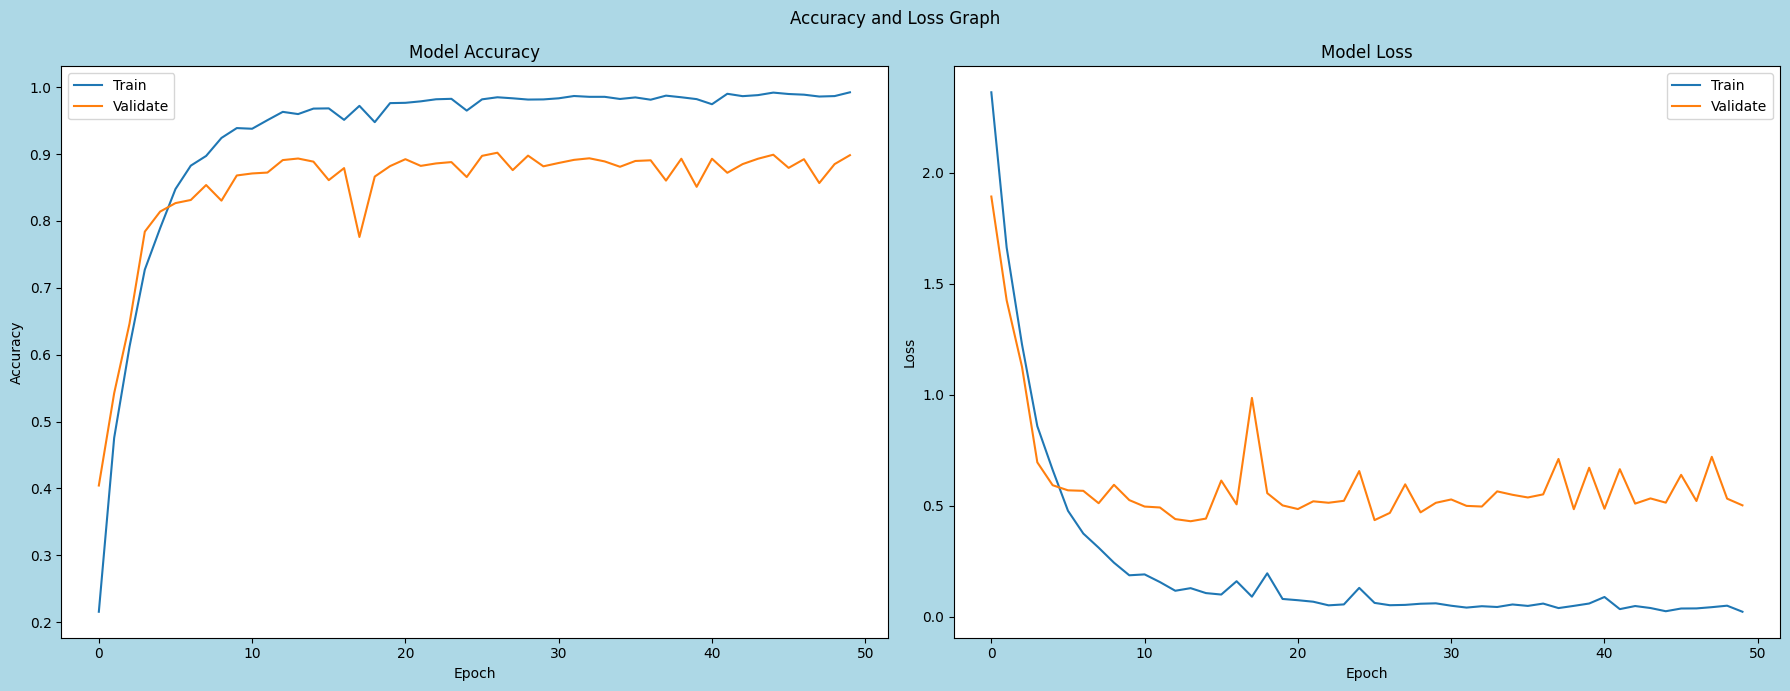

In [131]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(128,128,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(15,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=50, batch_size=64)

scores = model.evaluate(X_test,y_test)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
plotAUC(history)

### More dropouts were added to curb overfitting

Epoch 1/50
142/142 [==============================] - 6s 35ms/step - loss: 2.4164 - accuracy: 0.1920 - val_loss: 2.2991 - val_accuracy: 0.2320
Epoch 2/50
142/142 [==============================] - 5s 32ms/step - loss: 1.8160 - accuracy: 0.4199 - val_loss: 1.8964 - val_accuracy: 0.3943
Epoch 3/50
142/142 [==============================] - 5s 32ms/step - loss: 1.4235 - accuracy: 0.5450 - val_loss: 1.5455 - val_accuracy: 0.5043
Epoch 4/50
142/142 [==============================] - 4s 32ms/step - loss: 1.1464 - accuracy: 0.6360 - val_loss: 1.2748 - val_accuracy: 0.5870
Epoch 5/50
142/142 [==============================] - 4s 31ms/step - loss: 0.9815 - accuracy: 0.6880 - val_loss: 0.8430 - val_accuracy: 0.7347
Epoch 6/50
142/142 [==============================] - 4s 31ms/step - loss: 0.7785 - accuracy: 0.7528 - val_loss: 1.0649 - val_accuracy: 0.6780
Epoch 7/50
142/142 [==============================] - 4s 31ms/step - loss: 0.6374 - accuracy: 0.8002 - val_loss: 0.6060 - val_accuracy: 0.8113

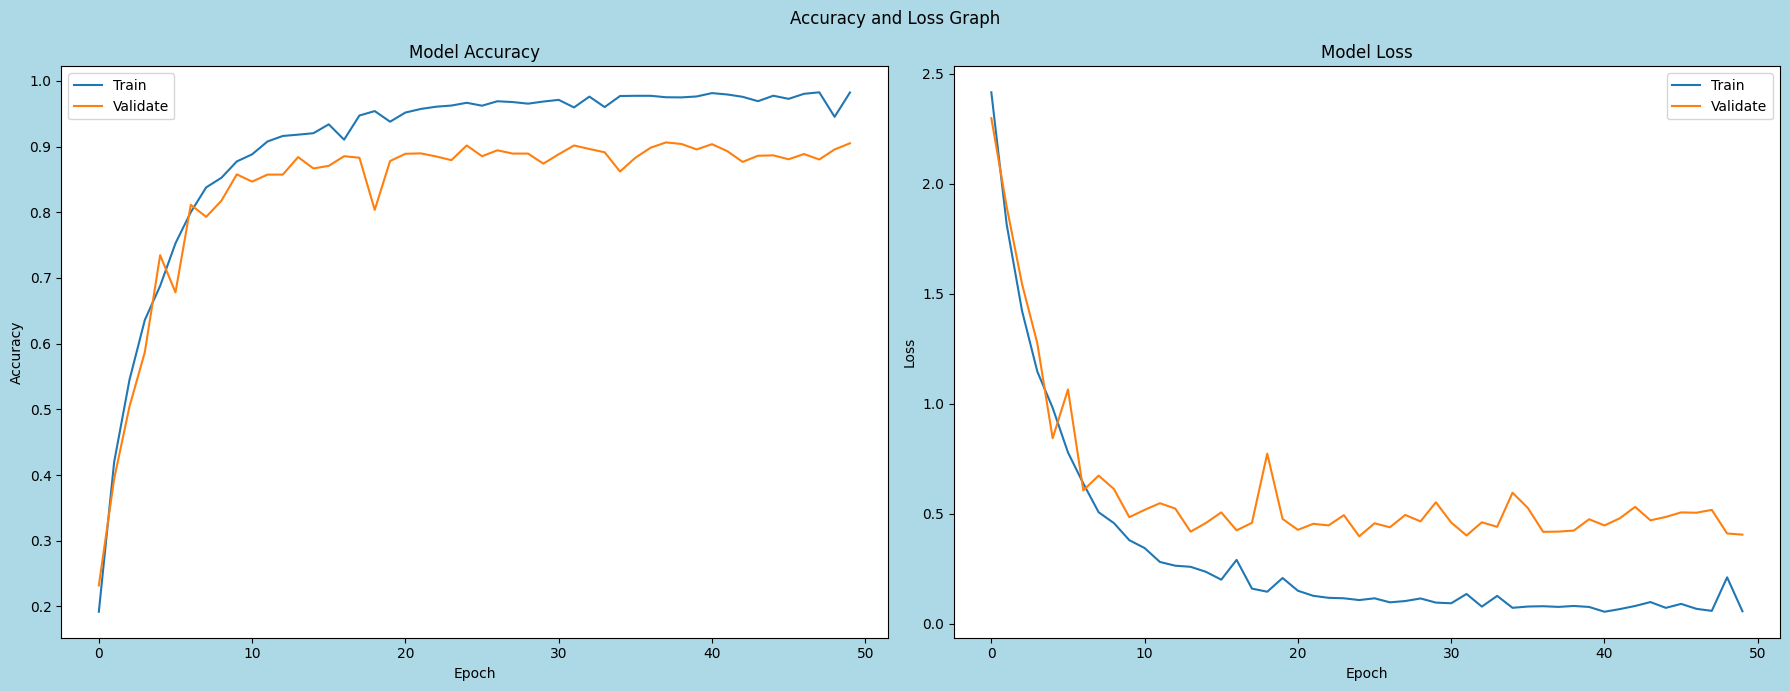

In [132]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(128,128,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(15,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=50, batch_size=64)
model.save_weights("./CNN Weights (128 by 128)/model1.h5")
scores = model.evaluate(X_test,y_test)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
plotAUC(history)

In [133]:
model.summary()

Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_250 (Conv2D)         (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_236 (MaxPooli  (None, 63, 63, 32)       0         
 ng2D)                                                           
                                                                 
 dropout_339 (Dropout)       (None, 63, 63, 32)        0         
                                                                 
 conv2d_251 (Conv2D)         (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_237 (MaxPooli  (None, 30, 30, 64)       0         
 ng2D)                                                           
                                                                 
 dropout_340 (Dropout)       (None, 30, 30, 64)      

## Load Model 1 (128 x 128)

In [134]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(128,128,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(15,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.load_weights("./CNN Weights (128 by 128)/model1.h5")

## Model 2 (128 x 128)

Epoch 1/50
142/142 [==============================] - 9s 60ms/step - loss: 2.2314 - accuracy: 0.2613 - val_loss: 2.0446 - val_accuracy: 0.3410
Epoch 2/50
142/142 [==============================] - 8s 57ms/step - loss: 1.4793 - accuracy: 0.5299 - val_loss: 1.1031 - val_accuracy: 0.6567
Epoch 3/50
142/142 [==============================] - 8s 56ms/step - loss: 0.9449 - accuracy: 0.6947 - val_loss: 0.8699 - val_accuracy: 0.7207
Epoch 4/50
142/142 [==============================] - 8s 55ms/step - loss: 0.6310 - accuracy: 0.8000 - val_loss: 0.6473 - val_accuracy: 0.8017
Epoch 5/50
142/142 [==============================] - 8s 55ms/step - loss: 0.3991 - accuracy: 0.8714 - val_loss: 0.4979 - val_accuracy: 0.8537
Epoch 6/50
142/142 [==============================] - 8s 55ms/step - loss: 0.2803 - accuracy: 0.9098 - val_loss: 0.4413 - val_accuracy: 0.8687
Epoch 7/50
142/142 [==============================] - 8s 55ms/step - loss: 0.1943 - accuracy: 0.9392 - val_loss: 0.5473 - val_accuracy: 0.8510

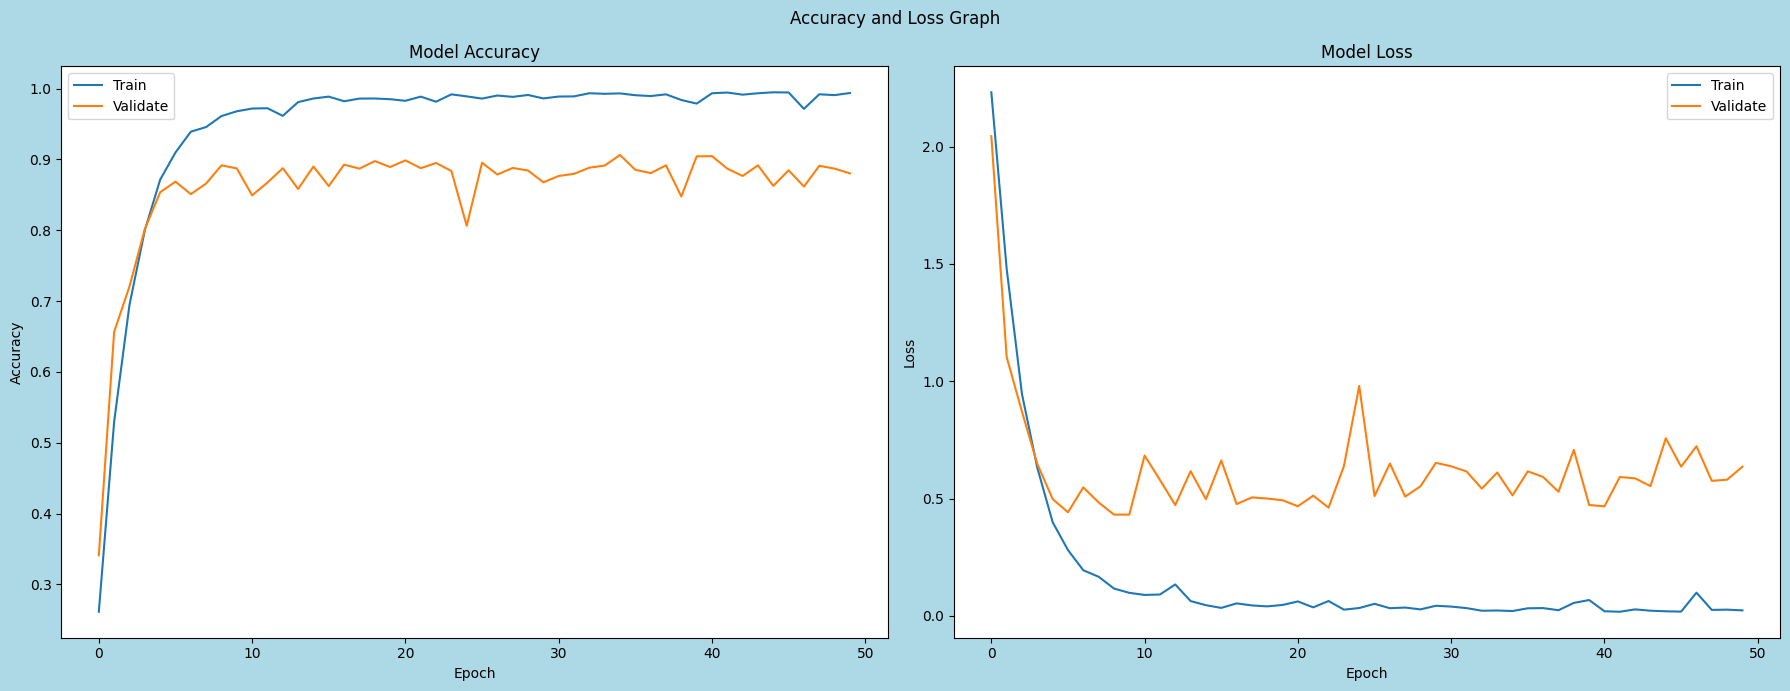

In [10]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(128,128,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(15,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=50, batch_size=64)
scores = model.evaluate(X_test,y_test)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
plotAUC(history)

### More Dropouts were added to curb overfitting

Epoch 1/50
142/142 [==============================] - 10s 66ms/step - loss: 2.5624 - accuracy: 0.1253 - val_loss: 2.4753 - val_accuracy: 0.1310
Epoch 2/50
142/142 [==============================] - 9s 63ms/step - loss: 1.9728 - accuracy: 0.3609 - val_loss: 1.6371 - val_accuracy: 0.4887
Epoch 3/50
142/142 [==============================] - 9s 63ms/step - loss: 1.5005 - accuracy: 0.5222 - val_loss: 1.2568 - val_accuracy: 0.6043
Epoch 4/50
142/142 [==============================] - 9s 63ms/step - loss: 1.1611 - accuracy: 0.6355 - val_loss: 0.9539 - val_accuracy: 0.6973
Epoch 5/50
142/142 [==============================] - 9s 63ms/step - loss: 0.9075 - accuracy: 0.7117 - val_loss: 0.8076 - val_accuracy: 0.7457
Epoch 6/50
142/142 [==============================] - 9s 63ms/step - loss: 0.7153 - accuracy: 0.7724 - val_loss: 0.6058 - val_accuracy: 0.8187
Epoch 7/50
142/142 [==============================] - 9s 63ms/step - loss: 0.5699 - accuracy: 0.8233 - val_loss: 0.4789 - val_accuracy: 0.852

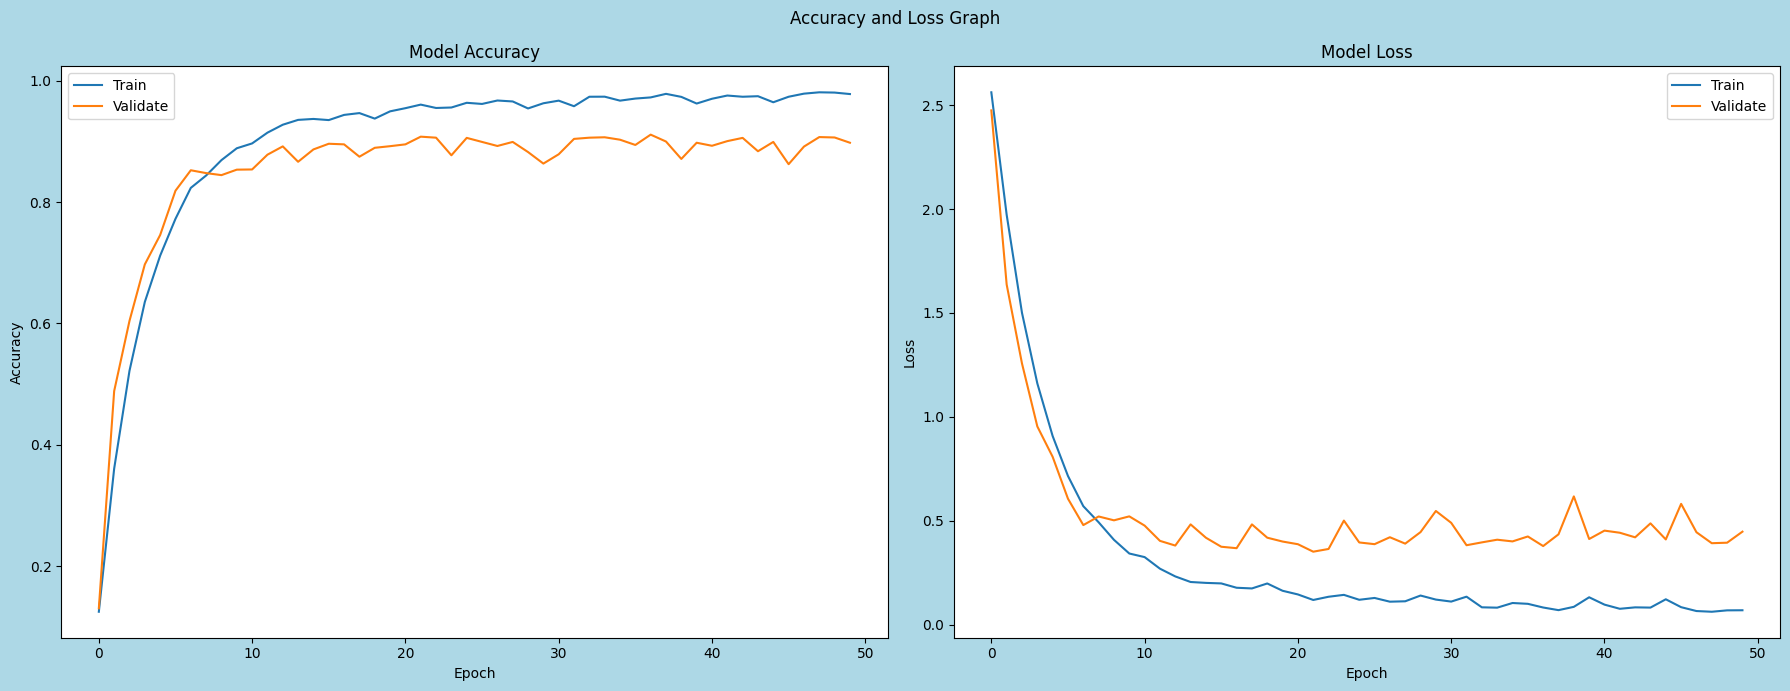

In [11]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(128,128,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(15,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=50, batch_size=64)
model.save_weights("./CNN Weights (128 by 128)/model2.h5")
scores = model.evaluate(X_test,y_test)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
plotAUC(history)

## Load Model 2 (128 x 128)

In [12]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(128,128,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(15,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.load_weights("./CNN Weights (128 by 128)/model2.h5")

## Model 3 (128 by 128)

Epoch 1/50
142/142 [==============================] - 6s 32ms/step - loss: 2.0570 - accuracy: 0.3329 - val_loss: 1.9072 - val_accuracy: 0.3930
Epoch 2/50
142/142 [==============================] - 4s 28ms/step - loss: 1.3126 - accuracy: 0.5915 - val_loss: 1.1339 - val_accuracy: 0.6503
Epoch 3/50
142/142 [==============================] - 4s 28ms/step - loss: 0.9378 - accuracy: 0.7077 - val_loss: 0.8430 - val_accuracy: 0.7257
Epoch 4/50
142/142 [==============================] - 4s 28ms/step - loss: 0.6491 - accuracy: 0.7913 - val_loss: 0.6181 - val_accuracy: 0.8093
Epoch 5/50
142/142 [==============================] - 4s 28ms/step - loss: 0.4644 - accuracy: 0.8501 - val_loss: 0.5436 - val_accuracy: 0.8370
Epoch 6/50
142/142 [==============================] - 4s 28ms/step - loss: 0.3293 - accuracy: 0.8960 - val_loss: 0.5447 - val_accuracy: 0.8453
Epoch 7/50
142/142 [==============================] - 4s 28ms/step - loss: 0.2683 - accuracy: 0.9111 - val_loss: 0.4947 - val_accuracy: 0.8587

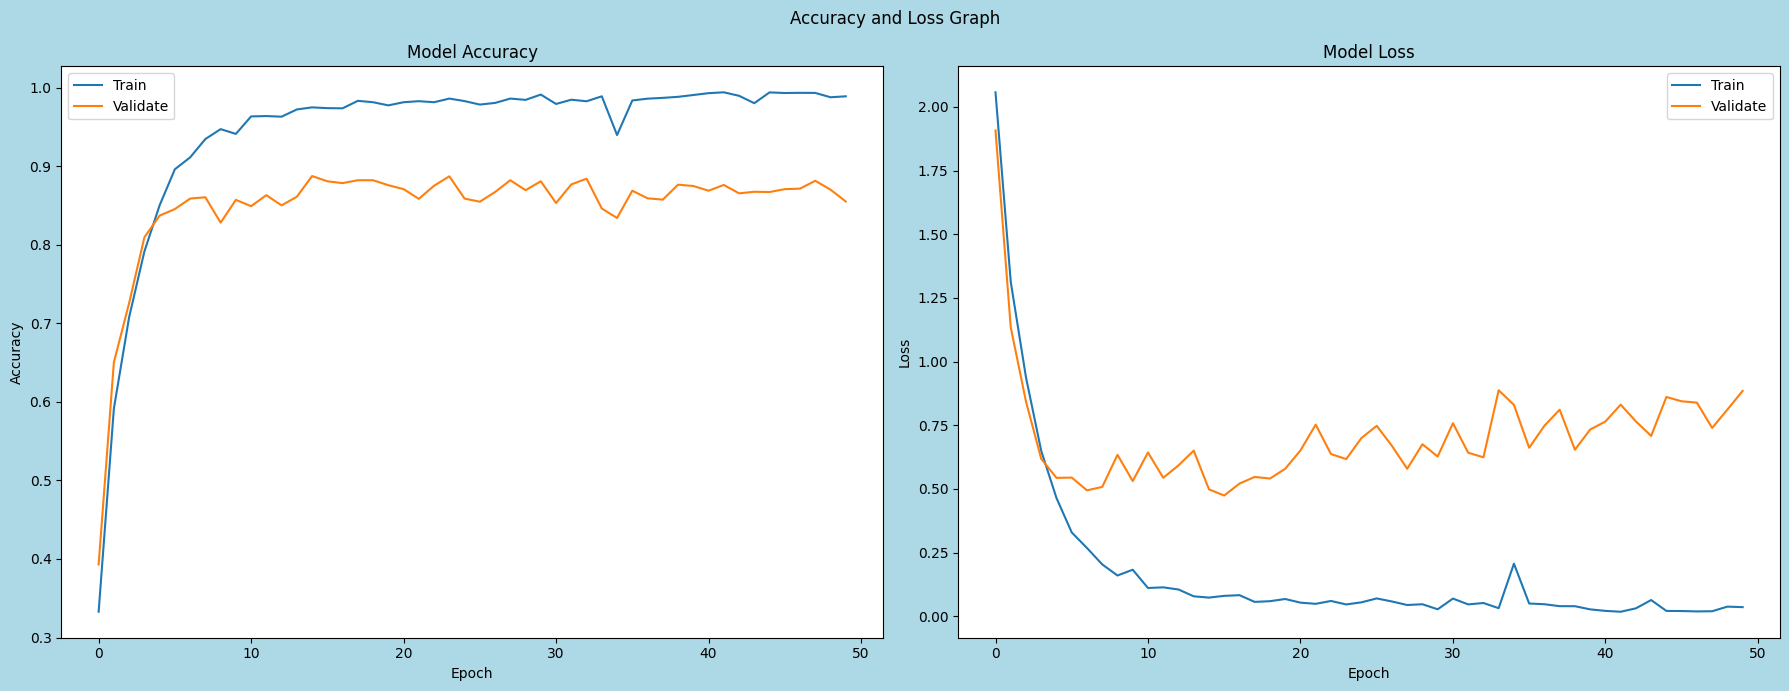

In [14]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(128,128,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(15,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=50, batch_size=64)

scores = model.evaluate(X_test,y_test)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
plotAUC(history)

### More Dropouts were added to curb overfitting as the loss graph shows a marginal increase towards the end.

Epoch 1/50
142/142 [==============================] - 8s 37ms/step - loss: 2.4346 - accuracy: 0.1938 - val_loss: 2.1699 - val_accuracy: 0.3087
Epoch 2/50
142/142 [==============================] - 5s 32ms/step - loss: 1.8106 - accuracy: 0.4205 - val_loss: 1.7204 - val_accuracy: 0.4530
Epoch 3/50
142/142 [==============================] - 5s 32ms/step - loss: 1.4363 - accuracy: 0.5409 - val_loss: 1.5412 - val_accuracy: 0.5013
Epoch 4/50
142/142 [==============================] - 5s 32ms/step - loss: 1.1248 - accuracy: 0.6356 - val_loss: 0.9706 - val_accuracy: 0.6943
Epoch 5/50
142/142 [==============================] - 5s 33ms/step - loss: 0.9090 - accuracy: 0.7023 - val_loss: 0.7986 - val_accuracy: 0.7403
Epoch 6/50
142/142 [==============================] - 5s 33ms/step - loss: 0.7272 - accuracy: 0.7648 - val_loss: 0.6618 - val_accuracy: 0.8063
Epoch 7/50
142/142 [==============================] - 5s 33ms/step - loss: 0.6122 - accuracy: 0.7987 - val_loss: 0.5831 - val_accuracy: 0.8113

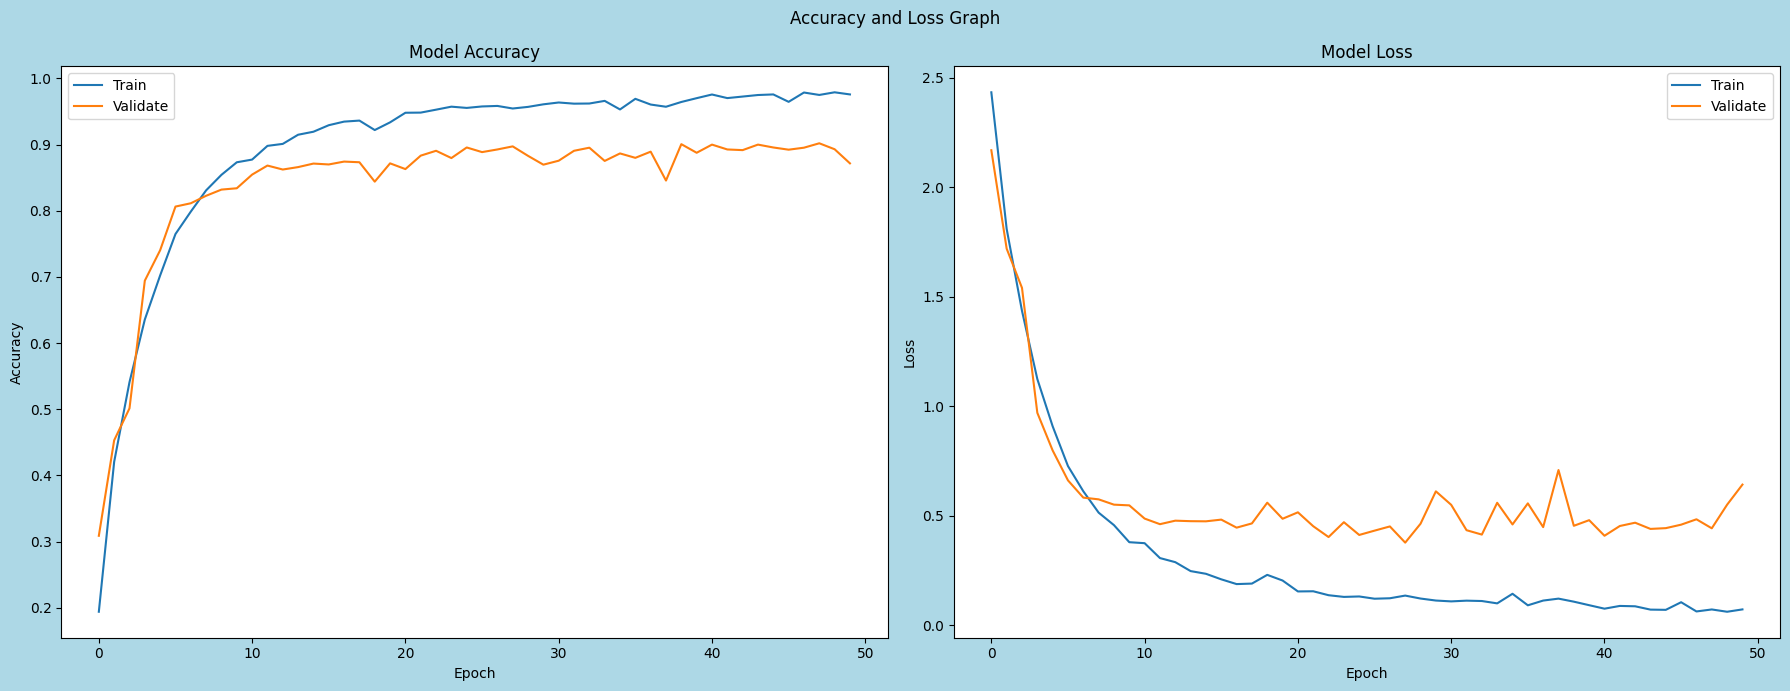

In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(128,128,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(15,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=50, batch_size=64)
model.save_weights("./CNN Weights (128 by 128)/model3.h5")
scores = model.evaluate(X_test,y_test)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
plotAUC(history)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

## Load Model 3 (128 x 128)

In [9]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(128,128,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(15,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.load_weights("./CNN Weights (128 by 128)/model3.h5")

## Data Augmentation

### From the scores, we will choose Model 1 and Model 2 to further improve it due to its high test and validation accuracy scores

### Model 1 (Before Augmentation)

Epoch 1/50
142/142 [==============================] - 6s 34ms/step - loss: 2.4773 - accuracy: 0.1608 - val_loss: 2.1693 - val_accuracy: 0.3207
Epoch 2/50
142/142 [==============================] - 5s 32ms/step - loss: 1.8187 - accuracy: 0.4116 - val_loss: 1.5705 - val_accuracy: 0.4913
Epoch 3/50
142/142 [==============================] - 5s 32ms/step - loss: 1.4427 - accuracy: 0.5336 - val_loss: 1.2905 - val_accuracy: 0.5920
Epoch 4/50
142/142 [==============================] - 5s 32ms/step - loss: 1.2025 - accuracy: 0.6131 - val_loss: 1.0292 - val_accuracy: 0.6800
Epoch 5/50
142/142 [==============================] - 5s 33ms/step - loss: 0.9936 - accuracy: 0.6837 - val_loss: 0.8290 - val_accuracy: 0.7460
Epoch 6/50
142/142 [==============================] - 5s 32ms/step - loss: 0.8146 - accuracy: 0.7401 - val_loss: 0.7248 - val_accuracy: 0.7757
Epoch 7/50
142/142 [==============================] - 5s 32ms/step - loss: 0.6606 - accuracy: 0.7931 - val_loss: 0.6169 - val_accuracy: 0.8120

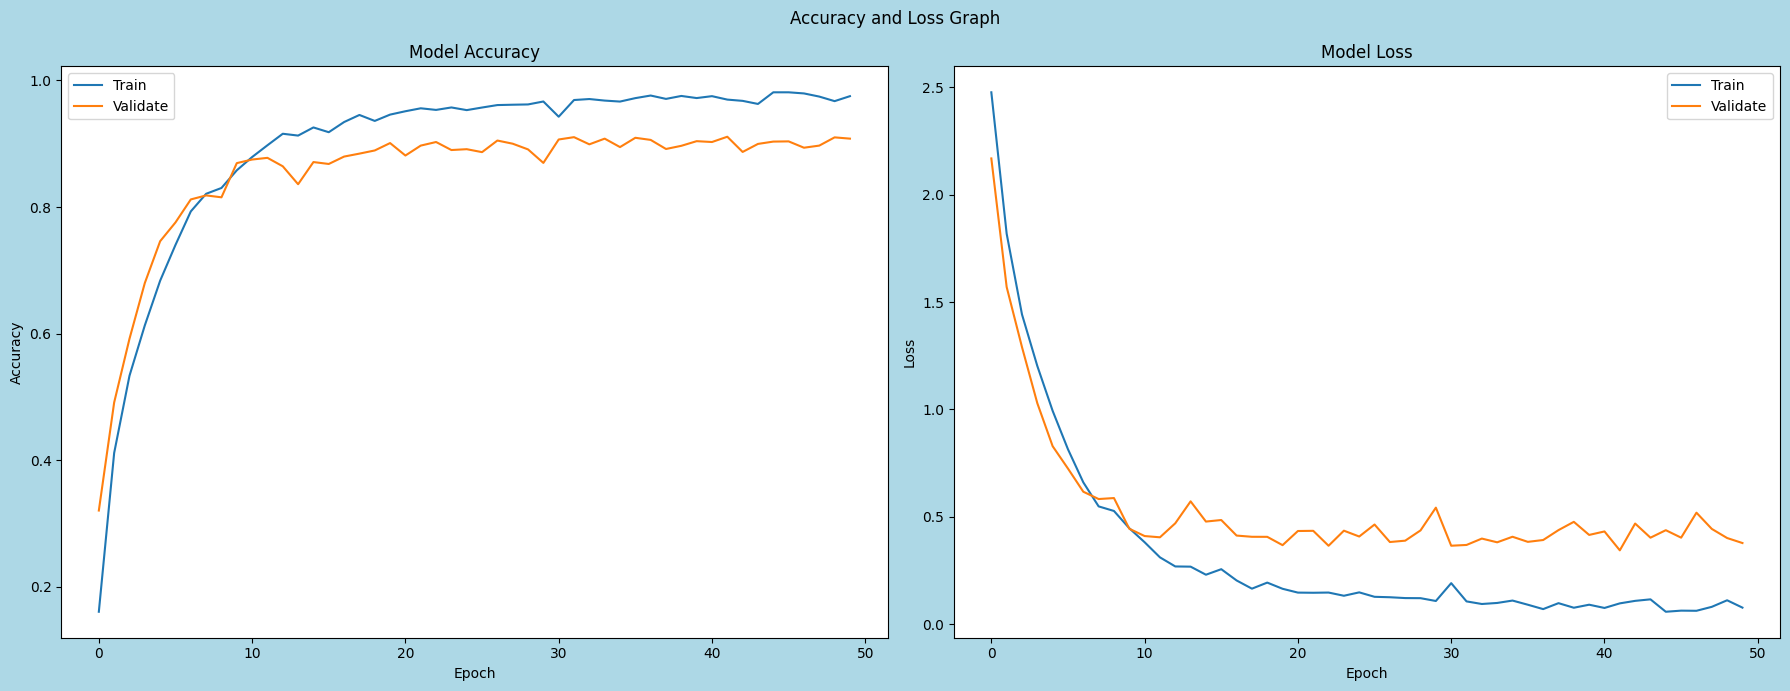

In [12]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(128,128,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(15,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=50, batch_size=64)

scores = model.evaluate(X_test,y_test)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
plotAUC(history)

### Model 1 (After Augmentation)

Epoch 1/50
142/142 [==============================] - 8s 53ms/step - loss: 2.4955 - accuracy: 0.1599 - val_loss: 2.2380 - val_accuracy: 0.3130
Epoch 2/50
142/142 [==============================] - 7s 49ms/step - loss: 1.8538 - accuracy: 0.4060 - val_loss: 1.9315 - val_accuracy: 0.3593
Epoch 3/50
142/142 [==============================] - 7s 49ms/step - loss: 1.4846 - accuracy: 0.5233 - val_loss: 2.9006 - val_accuracy: 0.2413
Epoch 4/50
142/142 [==============================] - 7s 48ms/step - loss: 1.2266 - accuracy: 0.6133 - val_loss: 1.1657 - val_accuracy: 0.6340
Epoch 5/50
142/142 [==============================] - 7s 49ms/step - loss: 0.9686 - accuracy: 0.6925 - val_loss: 0.8707 - val_accuracy: 0.7307
Epoch 6/50
142/142 [==============================] - 7s 47ms/step - loss: 0.7827 - accuracy: 0.7531 - val_loss: 0.8915 - val_accuracy: 0.7207
Epoch 7/50
142/142 [==============================] - 7s 46ms/step - loss: 0.6538 - accuracy: 0.7912 - val_loss: 0.6167 - val_accuracy: 0.8137

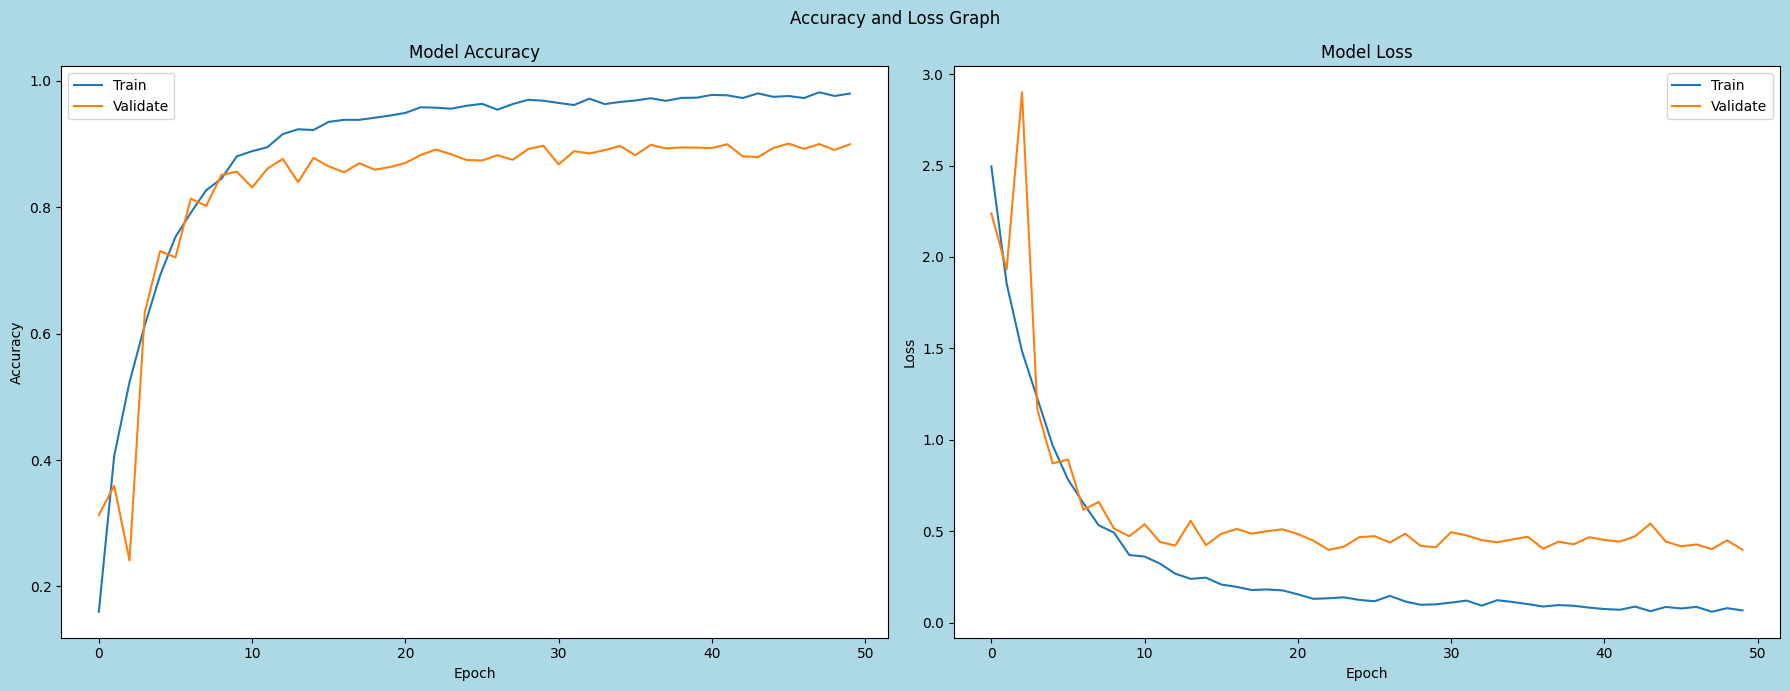

In [13]:
model = Sequential()
model.add(RandomFlip('horizontal',input_shape=(128,128,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(15,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=50, batch_size=64)

scores = model.evaluate(X_test,y_test)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
plotAUC(history)

### Augmentation decreases the accuracy score, we will not implement it

### Model 2 (Before Augmentation)

Epoch 1/50
142/142 [==============================] - 13s 68ms/step - loss: 2.4850 - accuracy: 0.1582 - val_loss: 2.0899 - val_accuracy: 0.3210
Epoch 2/50
142/142 [==============================] - 8s 59ms/step - loss: 1.7564 - accuracy: 0.4415 - val_loss: 1.4554 - val_accuracy: 0.5177
Epoch 3/50
142/142 [==============================] - 8s 59ms/step - loss: 1.3213 - accuracy: 0.5716 - val_loss: 1.3541 - val_accuracy: 0.5670
Epoch 4/50
142/142 [==============================] - 8s 60ms/step - loss: 1.0303 - accuracy: 0.6801 - val_loss: 0.8302 - val_accuracy: 0.7350
Epoch 5/50
142/142 [==============================] - 8s 60ms/step - loss: 0.7467 - accuracy: 0.7693 - val_loss: 0.7806 - val_accuracy: 0.7510
Epoch 6/50
142/142 [==============================] - 8s 59ms/step - loss: 0.5834 - accuracy: 0.8126 - val_loss: 0.6830 - val_accuracy: 0.7933
Epoch 7/50
142/142 [==============================] - 8s 60ms/step - loss: 0.4737 - accuracy: 0.8517 - val_loss: 0.4732 - val_accuracy: 0.860

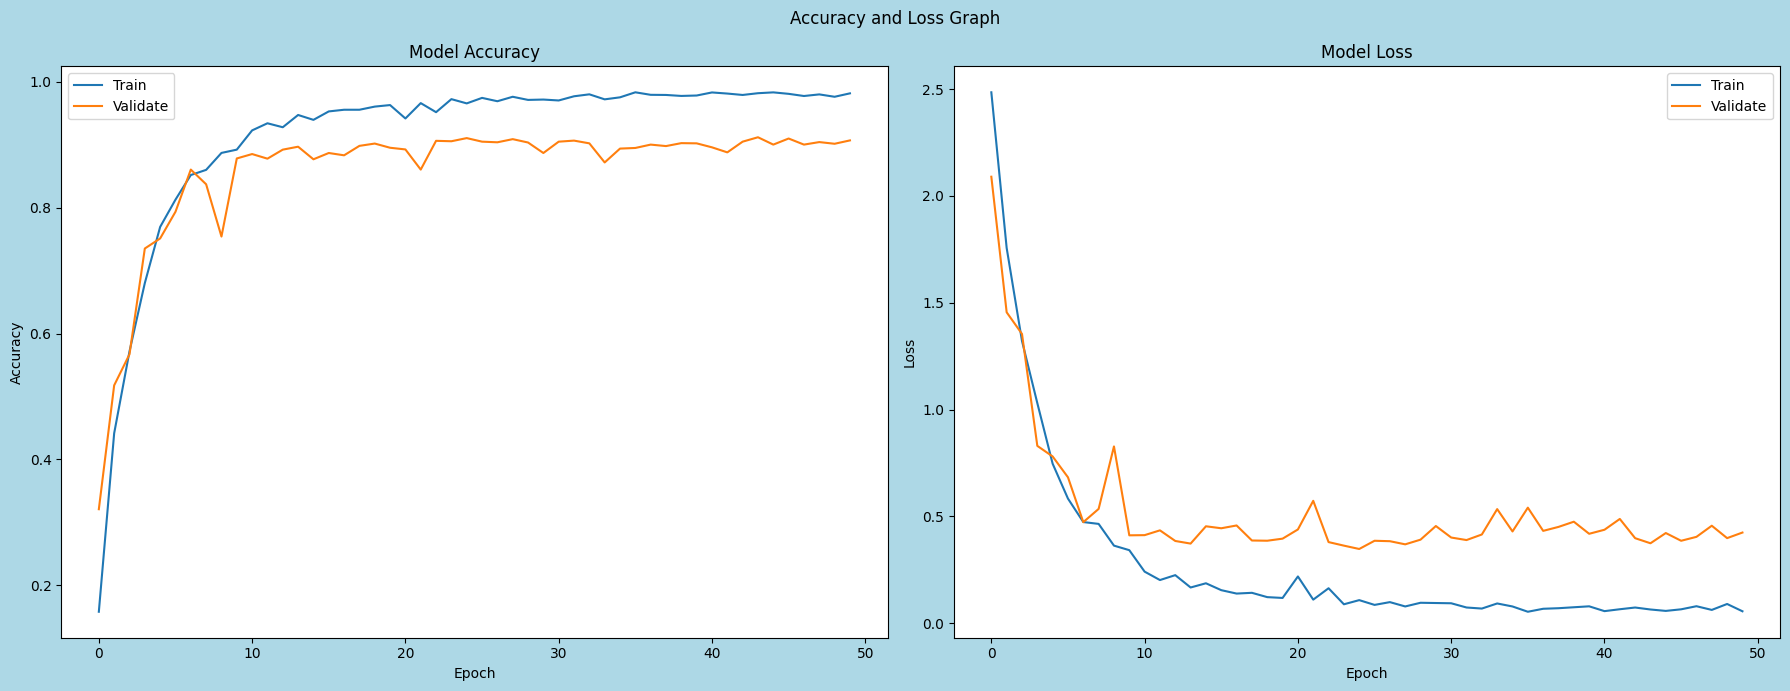

In [8]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(128,128,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(15,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=50, batch_size=64)

scores = model.evaluate(X_test,y_test)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
plotAUC(history)

### Model 2 (After Augmentation)

Epoch 1/50
142/142 [==============================] - 12s 77ms/step - loss: 2.4354 - accuracy: 0.1736 - val_loss: 2.4967 - val_accuracy: 0.1700
Epoch 2/50
142/142 [==============================] - 11s 75ms/step - loss: 1.7627 - accuracy: 0.4311 - val_loss: 1.7003 - val_accuracy: 0.4480
Epoch 3/50
142/142 [==============================] - 11s 77ms/step - loss: 1.3141 - accuracy: 0.5839 - val_loss: 1.0935 - val_accuracy: 0.6497
Epoch 4/50
142/142 [==============================] - 11s 76ms/step - loss: 0.9700 - accuracy: 0.6942 - val_loss: 0.9332 - val_accuracy: 0.6910
Epoch 5/50
142/142 [==============================] - 11s 76ms/step - loss: 0.7765 - accuracy: 0.7542 - val_loss: 0.7807 - val_accuracy: 0.7547
Epoch 6/50
142/142 [==============================] - 10s 74ms/step - loss: 0.5799 - accuracy: 0.8168 - val_loss: 1.8620 - val_accuracy: 0.5240
Epoch 7/50
142/142 [==============================] - 10s 74ms/step - loss: 0.5268 - accuracy: 0.8368 - val_loss: 0.4625 - val_accuracy:

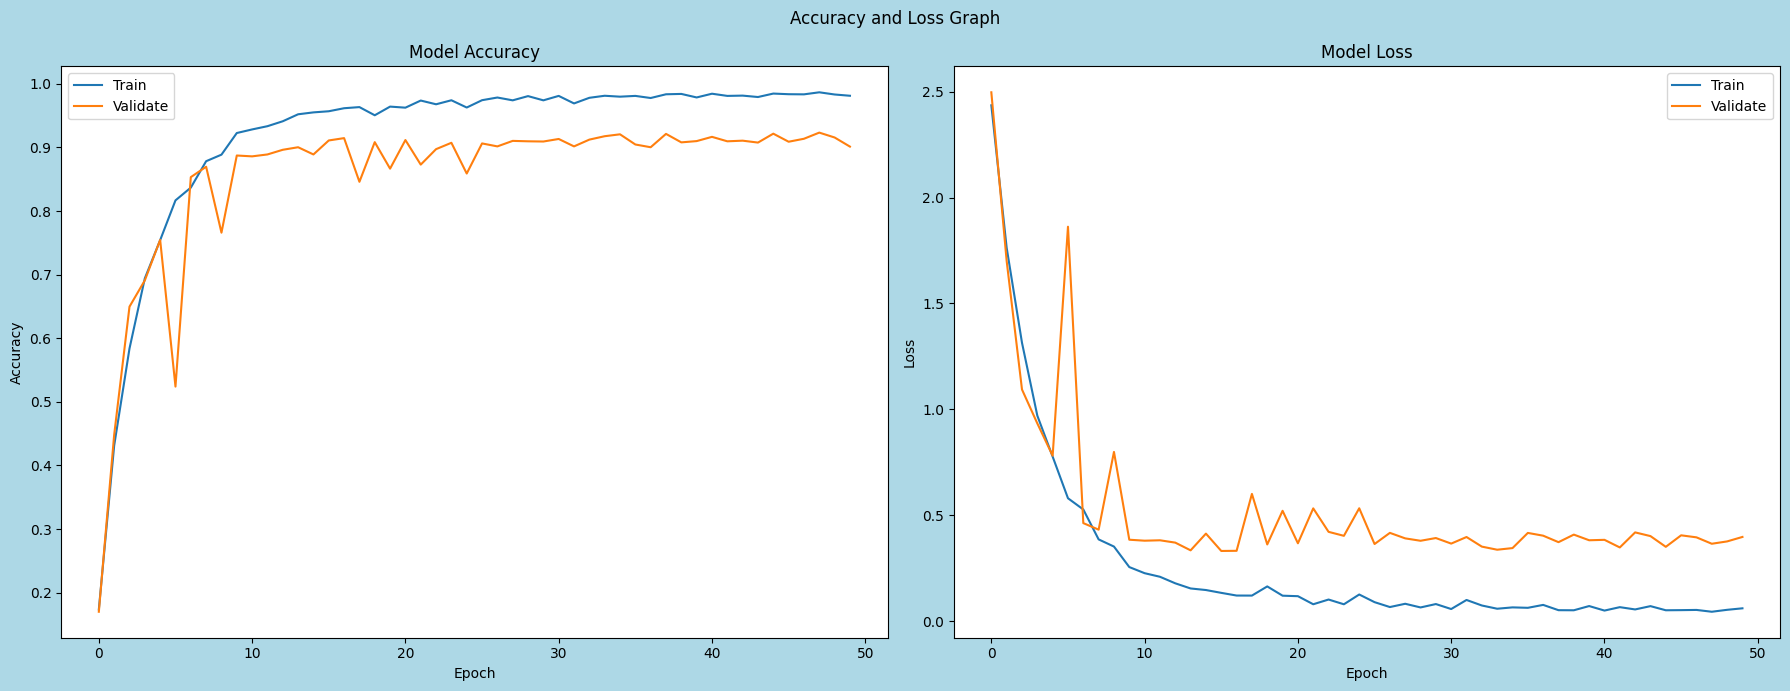

In [9]:
model = Sequential()
model.add(RandomFlip('horizontal',input_shape=(128,128,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(15,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=50, batch_size=64)

scores = model.evaluate(X_test,y_test)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
plotAUC(history)

### Random Flip improved model 2 accuracy by only 1% and about a similar validation score however the training time has also increased by 2 minutes. Upon weighing the trade off between time and accuracy, we will not implement it.

## Model Improvement

### We will further improve model 2 as it has a higher test and validation accuracy than model 1<br><br>1.Compare Activation Functions<br>2. Tuning Hyper-parameters<br>3. Learning Rate Scheduler

### Comparing Activation Functions

In [8]:
def getModel(activation):
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation=activation,input_shape=(128,128,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), activation=activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(256, (3, 3), activation=activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())

    model.add(Dense(512, activation=activation))
    model.add(Dropout(0.4))
    model.add(Dense(256, activation=activation))
    model.add(Dropout(0.4))
    model.add(Dense(15,activation='softmax'))

    return model

### We will be comparing 'tanh', 'relu' and sigmoid and determine which one yields the best performance.

In [9]:
activations = ['tanh','relu','sigmoid']

results = {}

for function in activations:
    model = getModel(function)
    model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train,y_train, validation_data=(X_val,y_val),epochs=50, batch_size=64)
    results[function] = history

Epoch 1/50
142/142 [==============================] - 15s 81ms/step - loss: 3.1779 - accuracy: 0.0824 - val_loss: 2.8255 - val_accuracy: 0.0667
Epoch 2/50
142/142 [==============================] - 11s 75ms/step - loss: 3.0432 - accuracy: 0.0835 - val_loss: 2.8813 - val_accuracy: 0.0667
Epoch 3/50
142/142 [==============================] - 11s 75ms/step - loss: 2.9391 - accuracy: 0.0888 - val_loss: 2.8347 - val_accuracy: 0.0667
Epoch 4/50
142/142 [==============================] - 11s 75ms/step - loss: 2.8840 - accuracy: 0.0830 - val_loss: 2.8496 - val_accuracy: 0.0667
Epoch 5/50
142/142 [==============================] - 11s 75ms/step - loss: 2.8283 - accuracy: 0.0878 - val_loss: 2.8539 - val_accuracy: 0.0667
Epoch 6/50
142/142 [==============================] - 11s 75ms/step - loss: 2.8025 - accuracy: 0.0845 - val_loss: 2.7991 - val_accuracy: 0.0667
Epoch 7/50
142/142 [==============================] - 11s 75ms/step - loss: 2.7690 - accuracy: 0.0846 - val_loss: 2.8351 - val_accuracy:

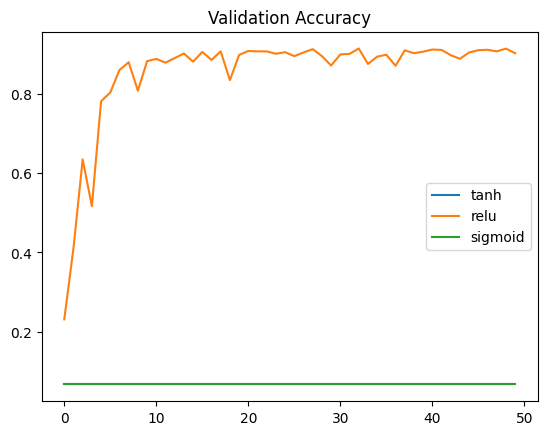

In [10]:
valLost = {k:v.history['val_accuracy'] for k,v in results.items()}
valLostCurve = pd.DataFrame(valLost)
valLostCurve.plot()
plt.title('Validation Accuracy')
plt.show()

### Activation 'relu' will be used.

### Hyper parameter tuning

### I will be doing hyper parameter tuning with one less layer to address the Resource Exhaustion Error. We will use this to determine the best optimizer<br>Before deciding to tune with one less layer, I have tried reducing the batch size, narrowing down the parameter to tune and using a smaller epoch.

In [12]:
def createModel(optimizer):
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(128,128,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(15,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'])
    return model

In [13]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import MaxPooling2D,GlobalAveragePooling2D
from sklearn.model_selection import RandomizedSearchCV, KFold
model = KerasClassifier(build_fn=createModel,epochs=30,batch_size=16)
paramGrid = {'optimizer':['rmsprop','adam']}
randomSearch = RandomizedSearchCV(model,param_distributions = paramGrid, cv=2)
randomSearchRes = randomSearch.fit(X_train,y_train)
print(f"Best Score: {randomSearchRes.best_score_} Best Params: {randomSearchRes.best_params_}")

C:\Users\kieny\AppData\Local\Temp\ipykernel_41576\2128538617.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=createModel,epochs=30,batch_size=16)


Epoch 1/30
283/283 [==============================] - 7s 22ms/step - loss: 2.5719 - accuracy: 0.2242
Epoch 2/30
283/283 [==============================] - 6s 21ms/step - loss: 1.7125 - accuracy: 0.4703
Epoch 3/30
283/283 [==============================] - 6s 21ms/step - loss: 1.2255 - accuracy: 0.6214
Epoch 4/30
283/283 [==============================] - 6s 20ms/step - loss: 0.9365 - accuracy: 0.7233
Epoch 5/30
283/283 [==============================] - 6s 21ms/step - loss: 0.6763 - accuracy: 0.7933
Epoch 6/30
283/283 [==============================] - 6s 22ms/step - loss: 0.5224 - accuracy: 0.8482
Epoch 7/30
283/283 [==============================] - 6s 21ms/step - loss: 0.3989 - accuracy: 0.8768
Epoch 8/30
283/283 [==============================] - 6s 21ms/step - loss: 0.3332 - accuracy: 0.8979
Epoch 9/30
283/283 [==============================] - 6s 21ms/step - loss: 0.2945 - accuracy: 0.9140
Epoch 10/30
283/283 [==============================] - 6s 21ms/step - loss: 0.2890 - accura

### We will be using the optimizer 'adam'

### Learning Rate Scheduler

### Now we will add learning rate scheduler to optimize the training and enhance the model's performance

Epoch 1/50
142/142 [==============================] - 10s 64ms/step - loss: 2.4743 - accuracy: 0.1683 - val_loss: 2.0606 - val_accuracy: 0.3423 - lr: 0.0010
Epoch 2/50
142/142 [==============================] - 9s 61ms/step - loss: 1.7633 - accuracy: 0.4335 - val_loss: 1.5273 - val_accuracy: 0.4917 - lr: 0.0010
Epoch 3/50
142/142 [==============================] - 9s 61ms/step - loss: 1.3556 - accuracy: 0.5748 - val_loss: 1.0579 - val_accuracy: 0.6690 - lr: 0.0010
Epoch 4/50
142/142 [==============================] - 9s 62ms/step - loss: 1.0224 - accuracy: 0.6693 - val_loss: 1.3213 - val_accuracy: 0.5757 - lr: 0.0010
Epoch 5/50
142/142 [==============================] - 9s 62ms/step - loss: 0.8463 - accuracy: 0.7364 - val_loss: 0.7001 - val_accuracy: 0.7873 - lr: 0.0010
Epoch 6/50
142/142 [==============================] - 9s 63ms/step - loss: 0.6485 - accuracy: 0.7910 - val_loss: 0.5612 - val_accuracy: 0.8347 - lr: 0.0010
Epoch 7/50
142/142 [==============================] - 9s 64ms/s

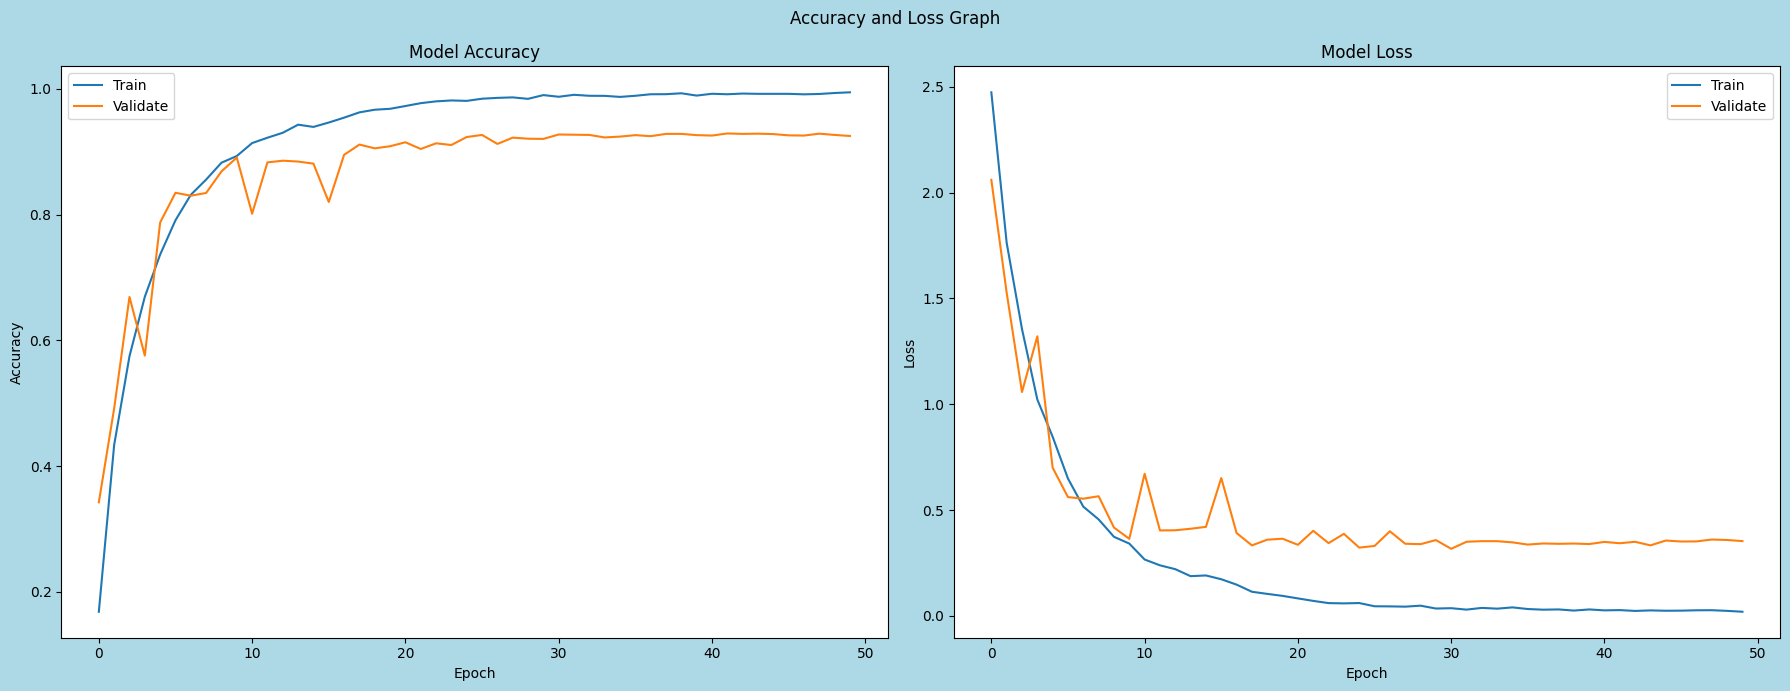

In [12]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduleLR(epoch,lr):
    if epoch<15:
        return lr
    else:
        return lr*tf.math.exp(-0.1)
    
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(128,128,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(15,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

callback = LearningRateScheduler(scheduleLR)
history = model.fit(X_train,y_train, validation_data=(X_val,y_val),epochs=50, batch_size=64,callbacks=[callback])
scores = model.evaluate(X_test,y_test)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
plotAUC(history)

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 64)      640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 63, 63, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 30, 30, 128)      

## Final 128 x 128 Model

Epoch 1/50
142/142 [==============================] - 10s 68ms/step - loss: 2.4376 - accuracy: 0.1844 - val_loss: 1.9839 - val_accuracy: 0.3913 - lr: 0.0010
Epoch 2/50
142/142 [==============================] - 9s 60ms/step - loss: 1.7014 - accuracy: 0.4513 - val_loss: 1.4992 - val_accuracy: 0.5040 - lr: 0.0010
Epoch 3/50
142/142 [==============================] - 8s 60ms/step - loss: 1.2909 - accuracy: 0.5904 - val_loss: 1.2357 - val_accuracy: 0.6217 - lr: 0.0010
Epoch 4/50
142/142 [==============================] - 8s 60ms/step - loss: 0.9580 - accuracy: 0.6944 - val_loss: 0.7227 - val_accuracy: 0.7710 - lr: 0.0010
Epoch 5/50
142/142 [==============================] - 8s 60ms/step - loss: 0.6989 - accuracy: 0.7779 - val_loss: 1.5557 - val_accuracy: 0.5613 - lr: 0.0010
Epoch 6/50
142/142 [==============================] - 9s 60ms/step - loss: 0.5968 - accuracy: 0.8134 - val_loss: 0.5501 - val_accuracy: 0.8313 - lr: 0.0010
Epoch 7/50
142/142 [==============================] - 9s 60ms/s

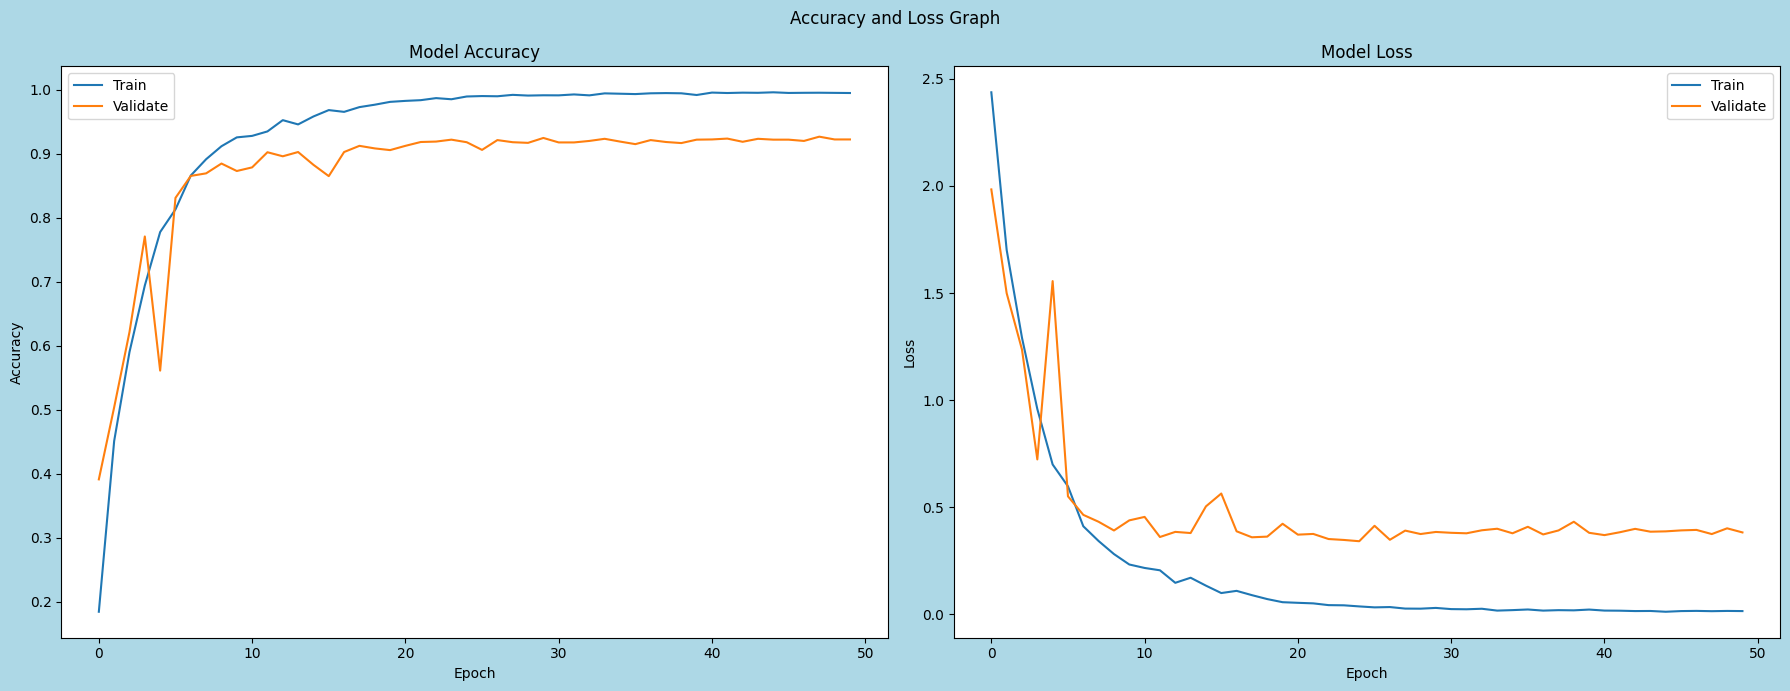

In [10]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduleLR(epoch,lr):
    if epoch<15:
        return lr
    else:
        return lr*tf.math.exp(-0.1)
    
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(128,128,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(15,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

callback = LearningRateScheduler(scheduleLR)
history = model.fit(X_train,y_train, validation_data=(X_val,y_val),epochs=50, batch_size=64,callbacks=[callback])
model.save_weights("./Best Model Weights/bestCNN128by128.h5")
scores = model.evaluate(X_test,y_test)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
plotAUC(history)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 128)       0

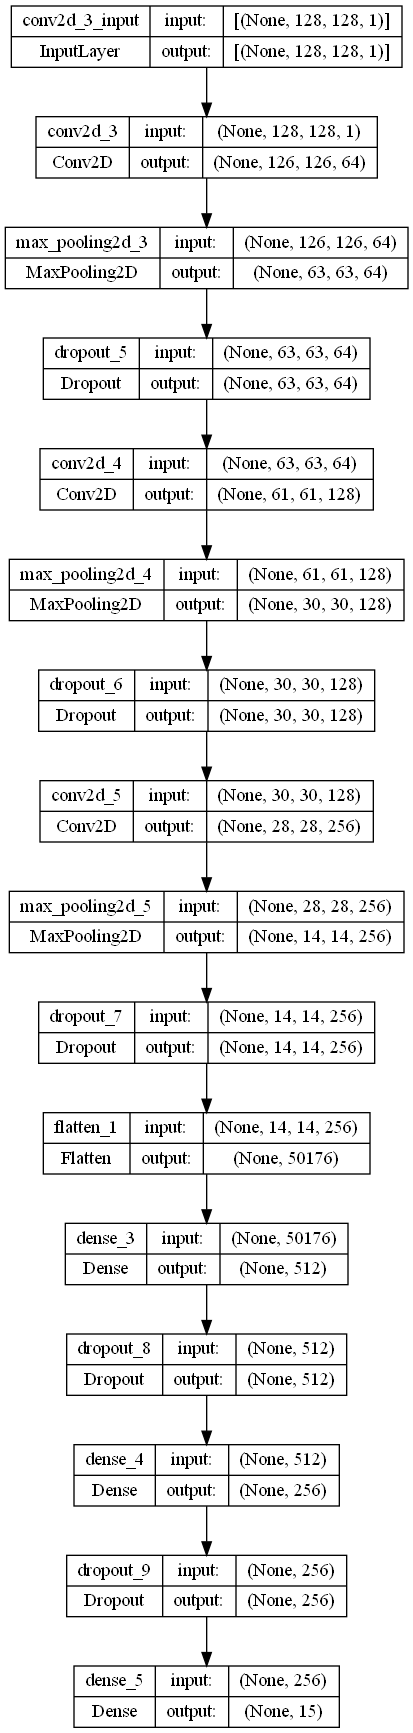

In [5]:
# pip install pydot
# pip install graphviz
# conda install graphviz
# Restart kernal after installation
plot_model(model,show_shapes=True,show_layer_names=True)

## Load 128 x 128 Model

In [4]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduleLR(epoch,lr):
    if epoch<15:
        return lr
    else:
        return lr*tf.math.exp(-0.1)
    
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(128,128,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(15,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

callback = LearningRateScheduler(scheduleLR)
model.load_weights("./Best Model Weights/bestCNN128by128.h5")

### Final 31 by 31 model: Test Accuracy: 95.57%<br>Validation Accuracy: 95.30%<br><br>Final 128 by 128 model: Test Accuracy: 92.8%<br>Validation Accuracy: 92.80%


### The 31 by 31 model is achieving a better test and validation accuracy than 128 by 128 model. This can be due to smaller images containing more sufficient information whereas the larger image might introduce more complexity which makes it harder for the model to capture the patterns.<br><br>All in all, this assignment has allowed me to learn more in depth about image classification using CNN and how image classification is important in real world applications